## *EDA In Depth*

*On this chapter ,we will use R-Programming Language in order to conduct descreptive and inferential analysis to analys the data as much as we can to help descion making*

---
---

*A. Install needed libraries*

In [2]:
library(tidyverse)
library(janitor)
library(ggplot2)
library(patchwork)
library(mosaic)
library(skimr)
library(GGally)
library(dlookr)
library(rstatix)
library(ggstatsplot)
library(effectsize)
library(gmodels)
library(ISLR)
library(repr)
options(repr.plot.width=25, repr.plot.height=7);

---
---

*B. Data Set*

In [3]:
df<- read.csv("C:/Users/Omar/Desktop/Omar_Files/Python_Analysis/Siteck_ML/Pepper _Price_Analysis/Data_Sets/data_set_for_stats.csv")

In [4]:
df %>% head()

week_start_dt week_end_dt vietnam_season p_color price    total_volume
1 2015-12-28    2016-01-03  2              green   6.599075 1596040     
2 2015-12-28    2016-01-03  2              red     7.175335 1596040     
3 2015-12-28    2016-01-03  2              yellow  7.300575 1596040     
4 2016-01-04    2016-01-10  2              yellow  7.379675 2295578     
5 2016-01-04    2016-01-10  2              red     7.175335 2295578     
6 2016-01-04    2016-01-10  2              green   6.599075 2295578     
  brazil  india   vietnam indonesia china brazil_season indonesia_season
1 10793.5 65658.1 1519589 0         0     False         False           
2 10793.5 65658.1 1519589 0         0     False         False           
3 10793.5 65658.1 1519589 0         0     False         False           
4  5677.8 15274.4 2274626 0         0     False         False           
5  5677.8 15274.4 2274626 0         0     False         False           
6  5677.8 15274.4 2274626 0         0     False         False           
  india_season china_season jordan_max_price jordan_min_price demand supply 
1 False        False        6.625            6.325              0.50  0.1650
2 False        False        7.525            7.125              0.51  0.1683
3 False        False        7.425            7.025             16.55  5.4615
4 False        False        7.525            7.025            271.16 89.4828
5 False        False        7.625            7.125             42.33 13.9689
6 False        False        6.625            6.325              0.58  0.1914

---

*B.1. Na Values*

In [5]:
df  %>% is.na() %>% sum()

[1] 0

---

*B.2. data types*

In [6]:
df %>% glimpse()

Rows: 1,215
Columns: 19
$ week_start_dt    <chr> "2015-12-28", "2015-12-28", "2015-12-28", "2016-01-04…
$ week_end_dt      <chr> "2016-01-03", "2016-01-03", "2016-01-03", "2016-01-10…
$ vietnam_season   <int> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,…
$ p_color          <chr> "green", "red", "yellow", "yellow", "red", "green", "…
$ price            <dbl> 6.599075, 7.175335, 7.300575, 7.379675, 7.175335, 6.5…
$ total_volume     <dbl> 1596040, 1596040, 1596040, 2295578, 2295578, 2295578,…
$ brazil           <dbl> 10793.5, 10793.5, 10793.5, 5677.8, 5677.8, 5677.8, 26…
$ india            <dbl> 65658.1, 65658.1, 65658.1, 15274.4, 15274.4, 15274.4,…
$ vietnam          <dbl> 1519589, 1519589, 1519589, 2274626, 2274626, 2274626,…
$ indonesia        <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ china            <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ brazil_season    <chr> "False", "False", "False", "False", "False", "False",…
$ indonesia_seas

---

*B.3. converting (week_start_dt,week_end_dt) to date factors,converting (vietnam_season,p_color,brazil_season,
,india_season,china_season) to factors*

In [7]:
df$week_start_dt<-as.Date.factor(df$week_start_dt);
df$week_end_dt<-as.Date.factor(df$week_end_dt)

In [8]:
df$vietnam_season<-as.factor(df$vietnam_season);
df$p_color<-as.factor(df$p_color);
df$india_season<-as.factor(df$india_season);
df$china_season<-as.factor(df$china_season);
df$brazil_season<-as.factor(df$brazil_season);
df$vietnam_season<-as.factor(df$vietnam_season);
df$indonesia_season<-as.factor(df$indonesia_season);

* *Confirm our changings*

In [9]:
df %>% glimpse()

Rows: 1,215
Columns: 19
$ week_start_dt    <date> 2015-12-28, 2015-12-28, 2015-12-28, 2016-01-04, 2016…
$ week_end_dt      <date> 2016-01-03, 2016-01-03, 2016-01-03, 2016-01-10, 2016…
$ vietnam_season   <fct> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,…
$ p_color          <fct> green, red, yellow, yellow, red, green, yellow, red, …
$ price            <dbl> 6.599075, 7.175335, 7.300575, 7.379675, 7.175335, 6.5…
$ total_volume     <dbl> 1596040, 1596040, 1596040, 2295578, 2295578, 2295578,…
$ brazil           <dbl> 10793.5, 10793.5, 10793.5, 5677.8, 5677.8, 5677.8, 26…
$ india            <dbl> 65658.1, 65658.1, 65658.1, 15274.4, 15274.4, 15274.4,…
$ vietnam          <dbl> 1519589, 1519589, 1519589, 2274626, 2274626, 2274626,…
$ indonesia        <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ china            <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ brazil_season    <fct> False, False, False, False, False, False, False, Fals…
$ indonesia_seas

---
---

*C. Analysis*

*C.1. Quick Data Summary*

In [10]:
df  %>% summary()

 week_start_dt         week_end_dt         vietnam_season   p_color   
 Min.   :2015-12-28   Min.   :2016-01-03   1:414          green :405  
 1st Qu.:2017-12-04   1st Qu.:2017-12-10   2:486          red   :405  
 Median :2019-11-11   Median :2019-11-17   3:315          yellow:405  
 Mean   :2019-11-11   Mean   :2019-11-17                              
 3rd Qu.:2021-10-18   3rd Qu.:2021-10-24                              
 Max.   :2023-09-25   Max.   :2023-10-01                              
     price         total_volume         brazil           india       
 Min.   : 6.300   Min.   : 325471   Min.   :     0   Min.   :     0  
 1st Qu.: 7.000   1st Qu.:1938246   1st Qu.: 10609   1st Qu.:     0  
 Median : 7.600   Median :2254902   Median :175493   Median :     0  
 Mean   : 8.009   Mean   :2244701   Mean   :245303   Mean   : 28744  
 3rd Qu.: 8.601   3rd Qu.:2541123   3rd Qu.:443551   3rd Qu.: 31023  
 Max.   :14.085   Max.   :3555979   Max.   :877648   Max.   :348997  
    vietnam  

In [11]:
my_thems=theme(text = element_text(size = 30),
      plot.subtitle = element_text(size = 30),
      legend.title = element_text(size = 30),
      legend.text = element_text(size = 30),
      axis.text.x = element_text(size = 30)
      )
count_label<-geom_text(aes(label = ..count..), stat = "count", vjust = 1.5, colour = "black",size=10)

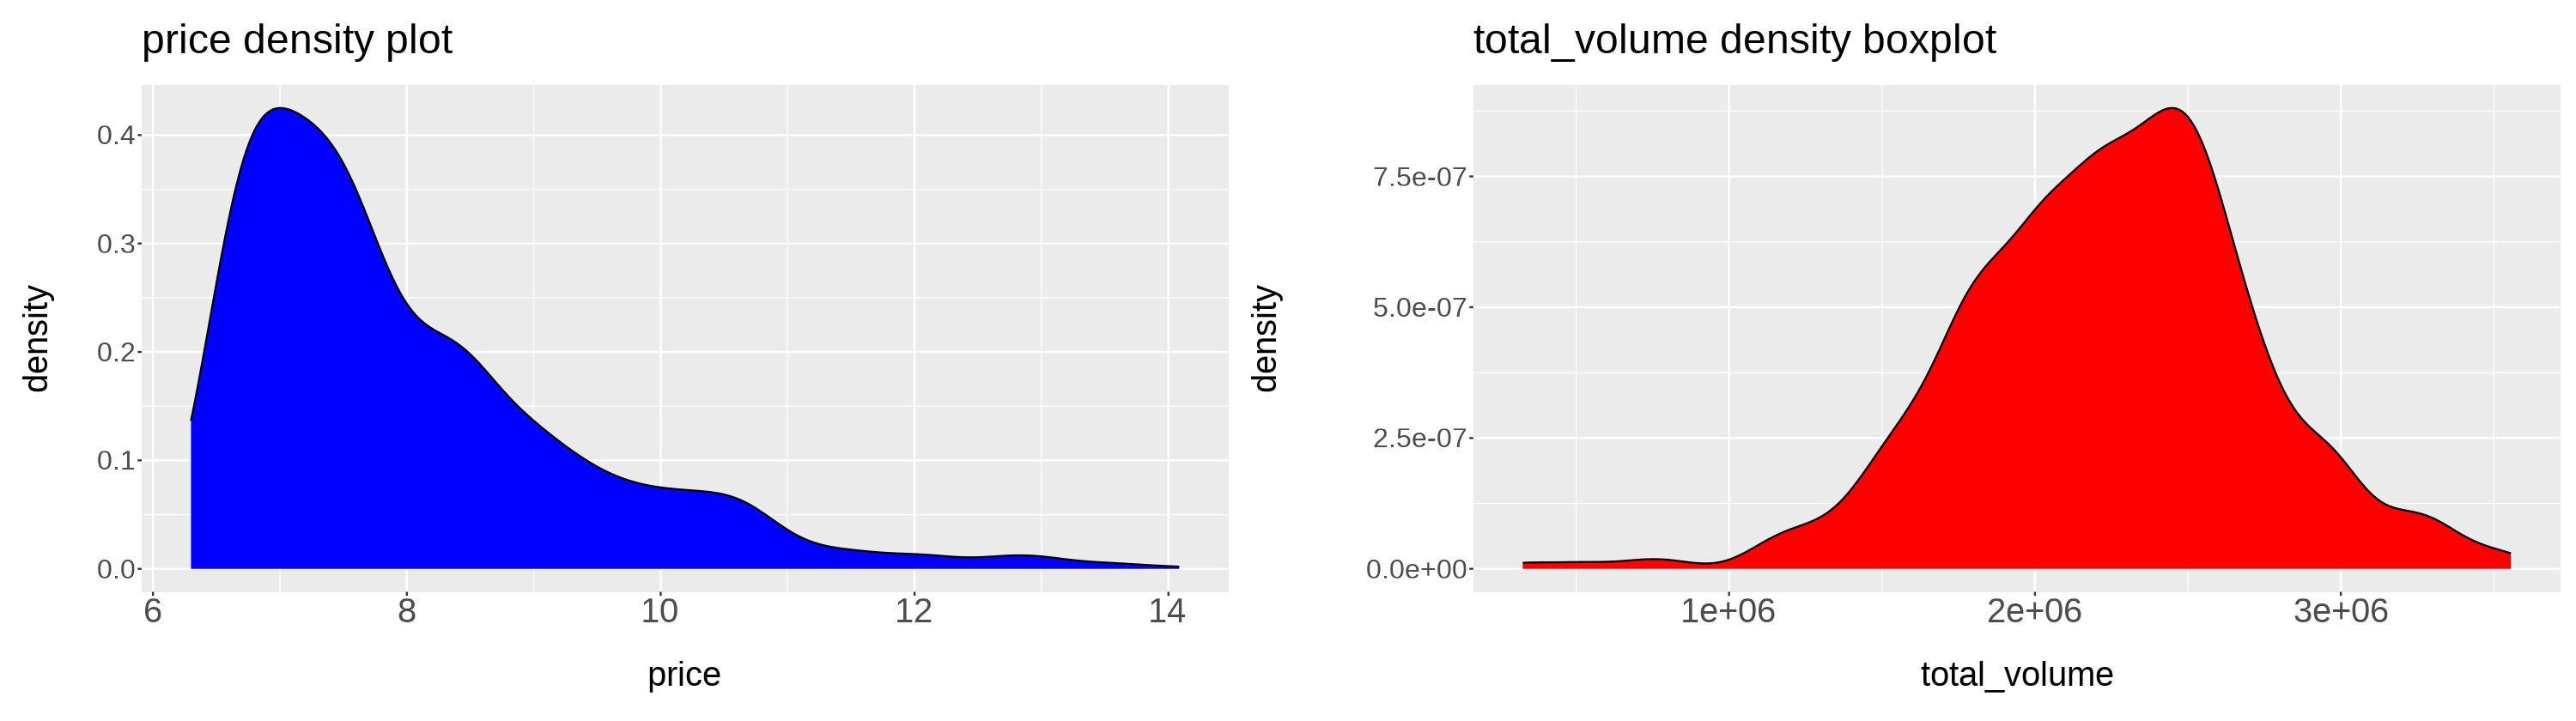

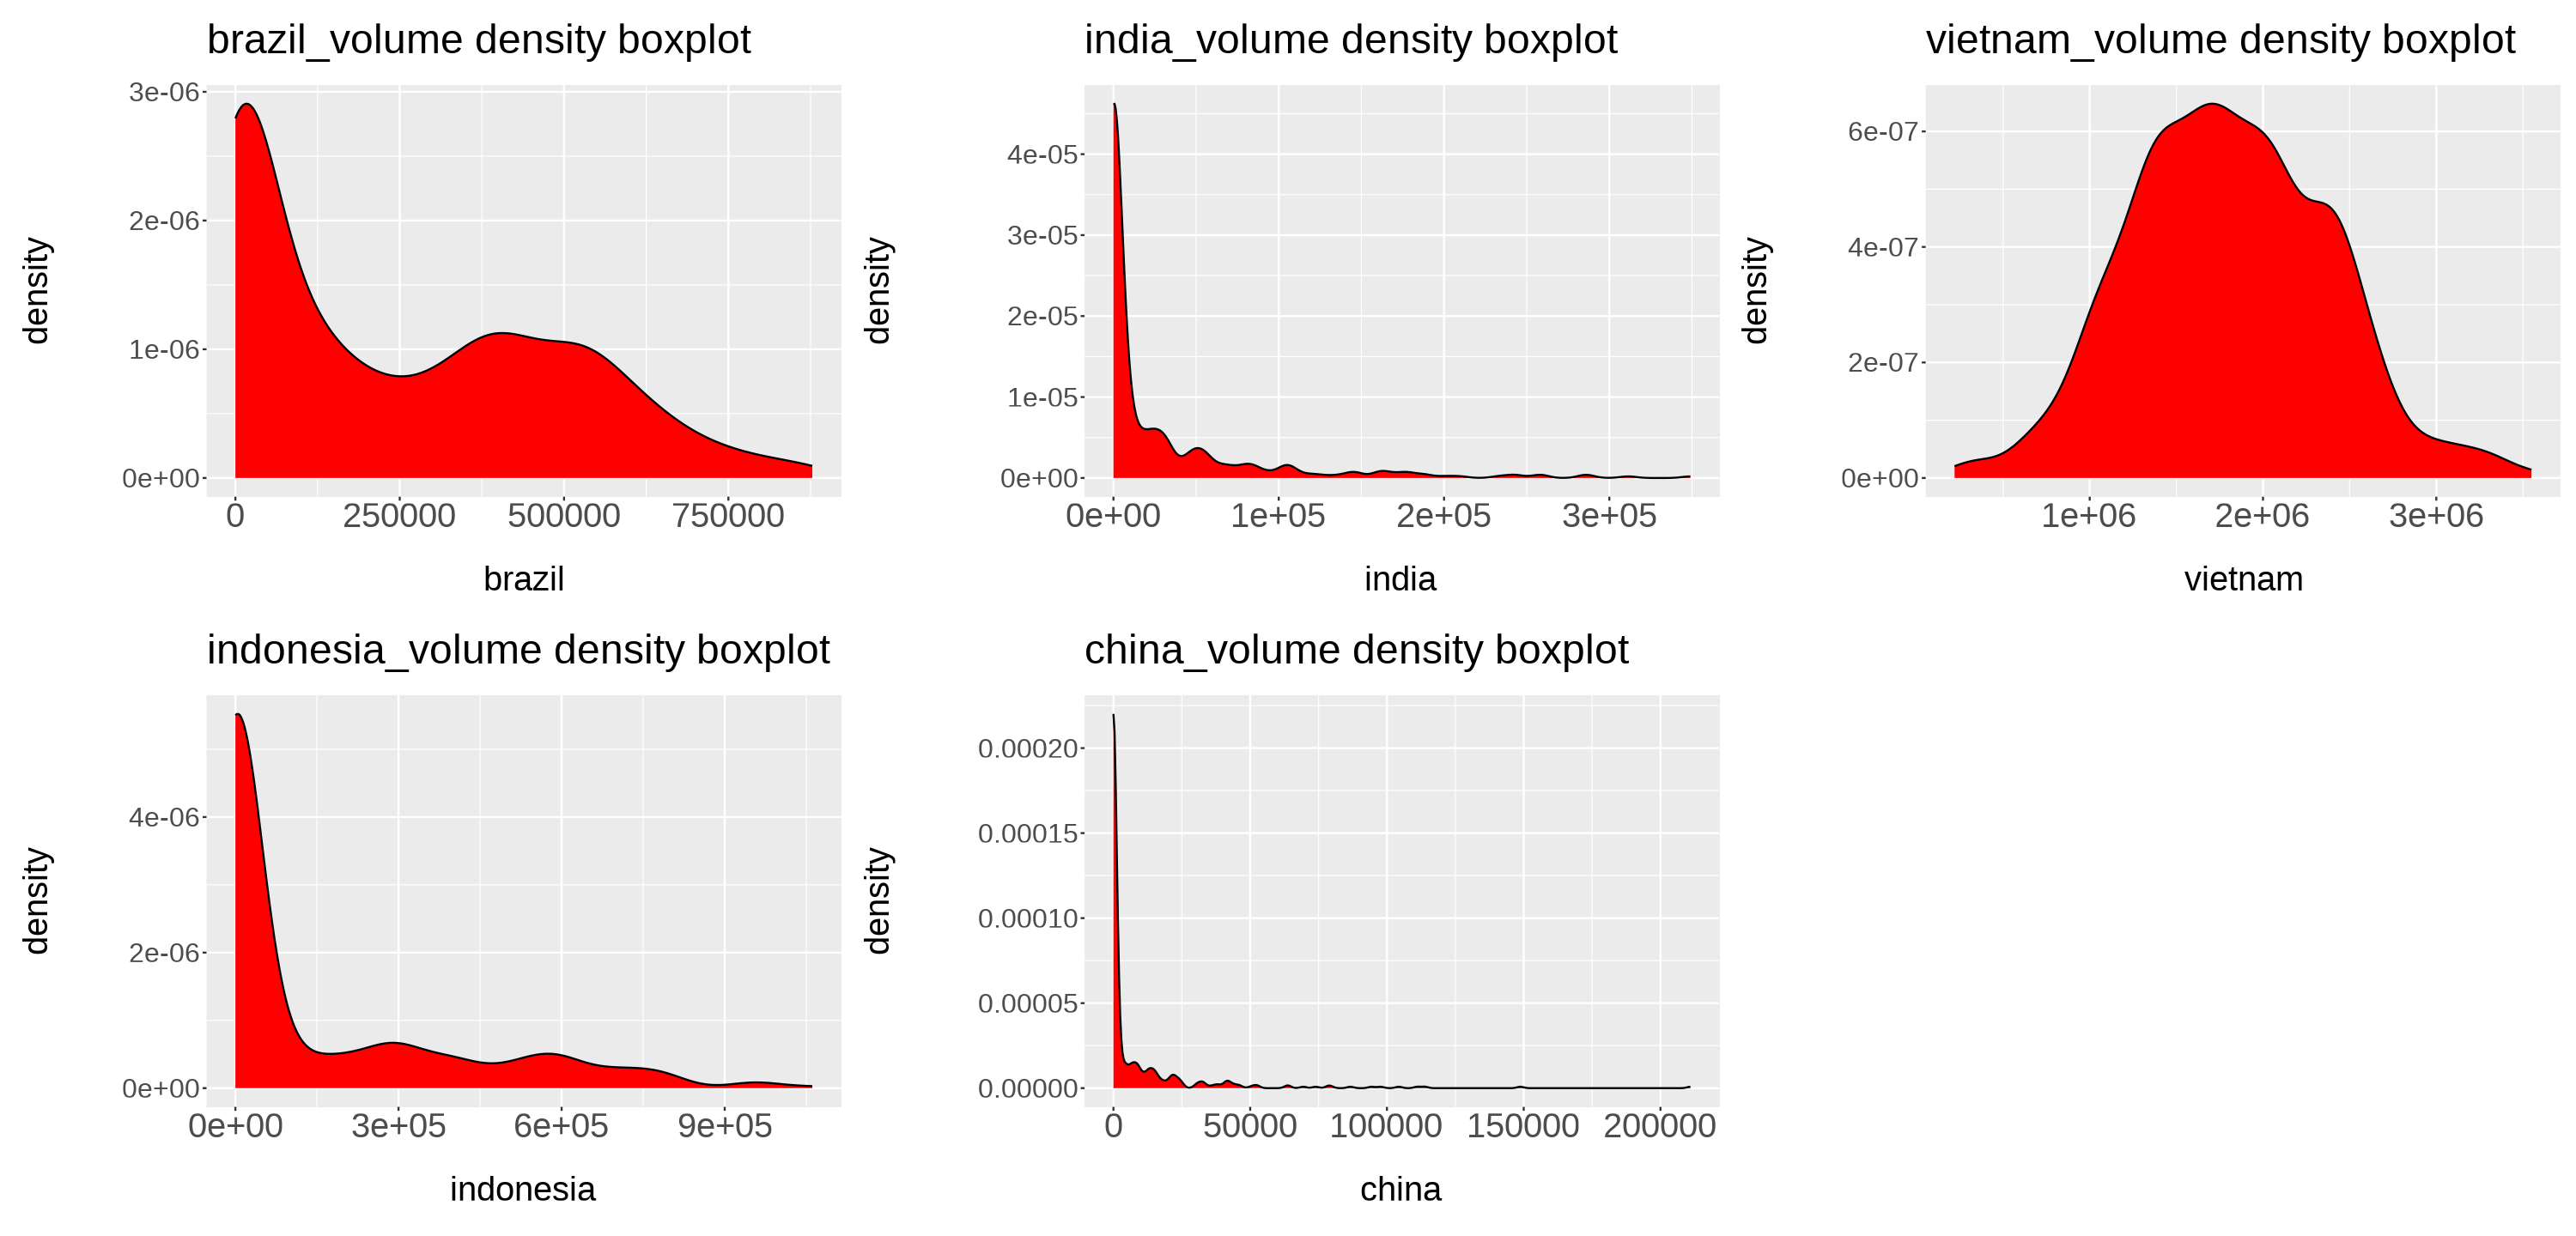

In [39]:
options(repr.plot.width=25, repr.plot.height=7);
df %>%  ggplot(aes(x=price))+geom_density(fill="blue")+ggtitle("price density plot")+my_thems+
df %>%  ggplot(aes(x=total_volume))+geom_density(fill="red")+ggtitle("total_volume density boxplot")+my_thems
options(repr.plot.width=25, repr.plot.height=12);
df %>%  ggplot(aes(x=brazil))+geom_density(fill="red")+ggtitle("brazil_volume density boxplot")+my_thems+
df %>%  ggplot(aes(x=india))+geom_density(fill="red")+ggtitle("india_volume density boxplot")+my_thems+
df %>%  ggplot(aes(x=vietnam))+geom_density(fill="red")+ggtitle("vietnam_volume density boxplot")+my_thems+
df %>%  ggplot(aes(x=indonesia))+geom_density(fill="red")+ggtitle("indonesia_volume density boxplot")+my_thems+
df %>%  ggplot(aes(x=china))+geom_density(fill="red")+ggtitle("china_volume density boxplot")+my_thems

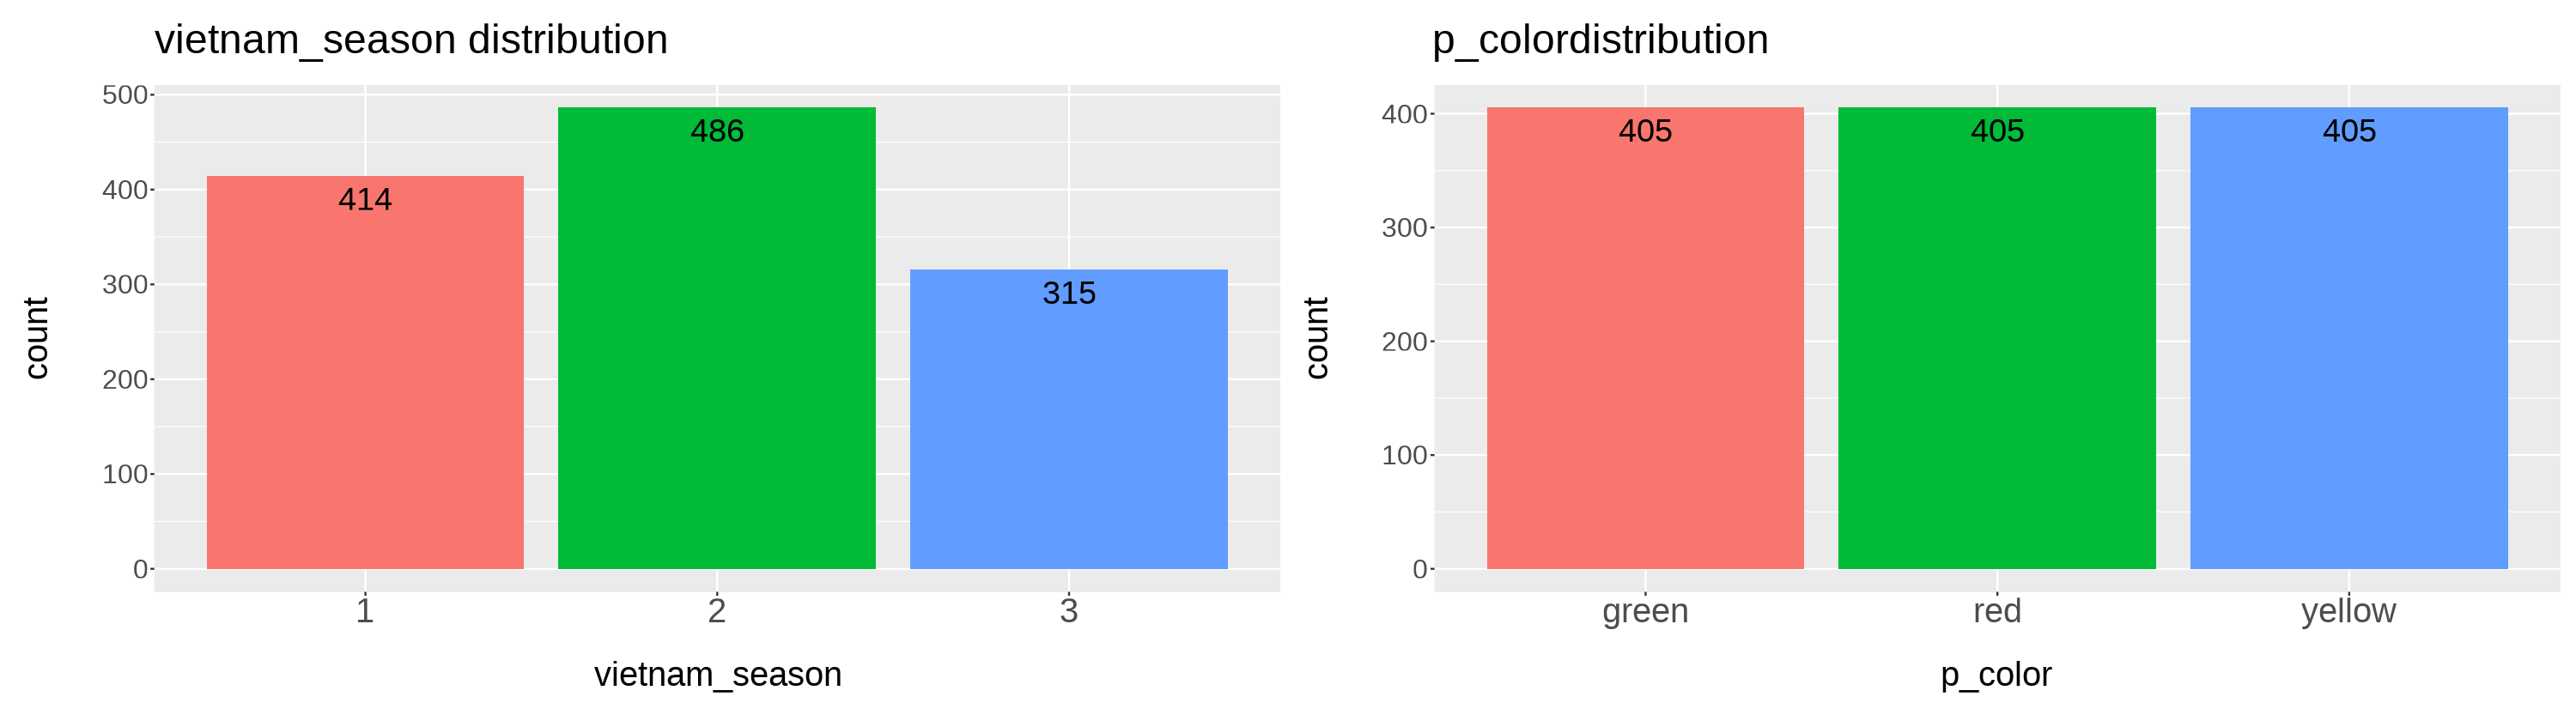

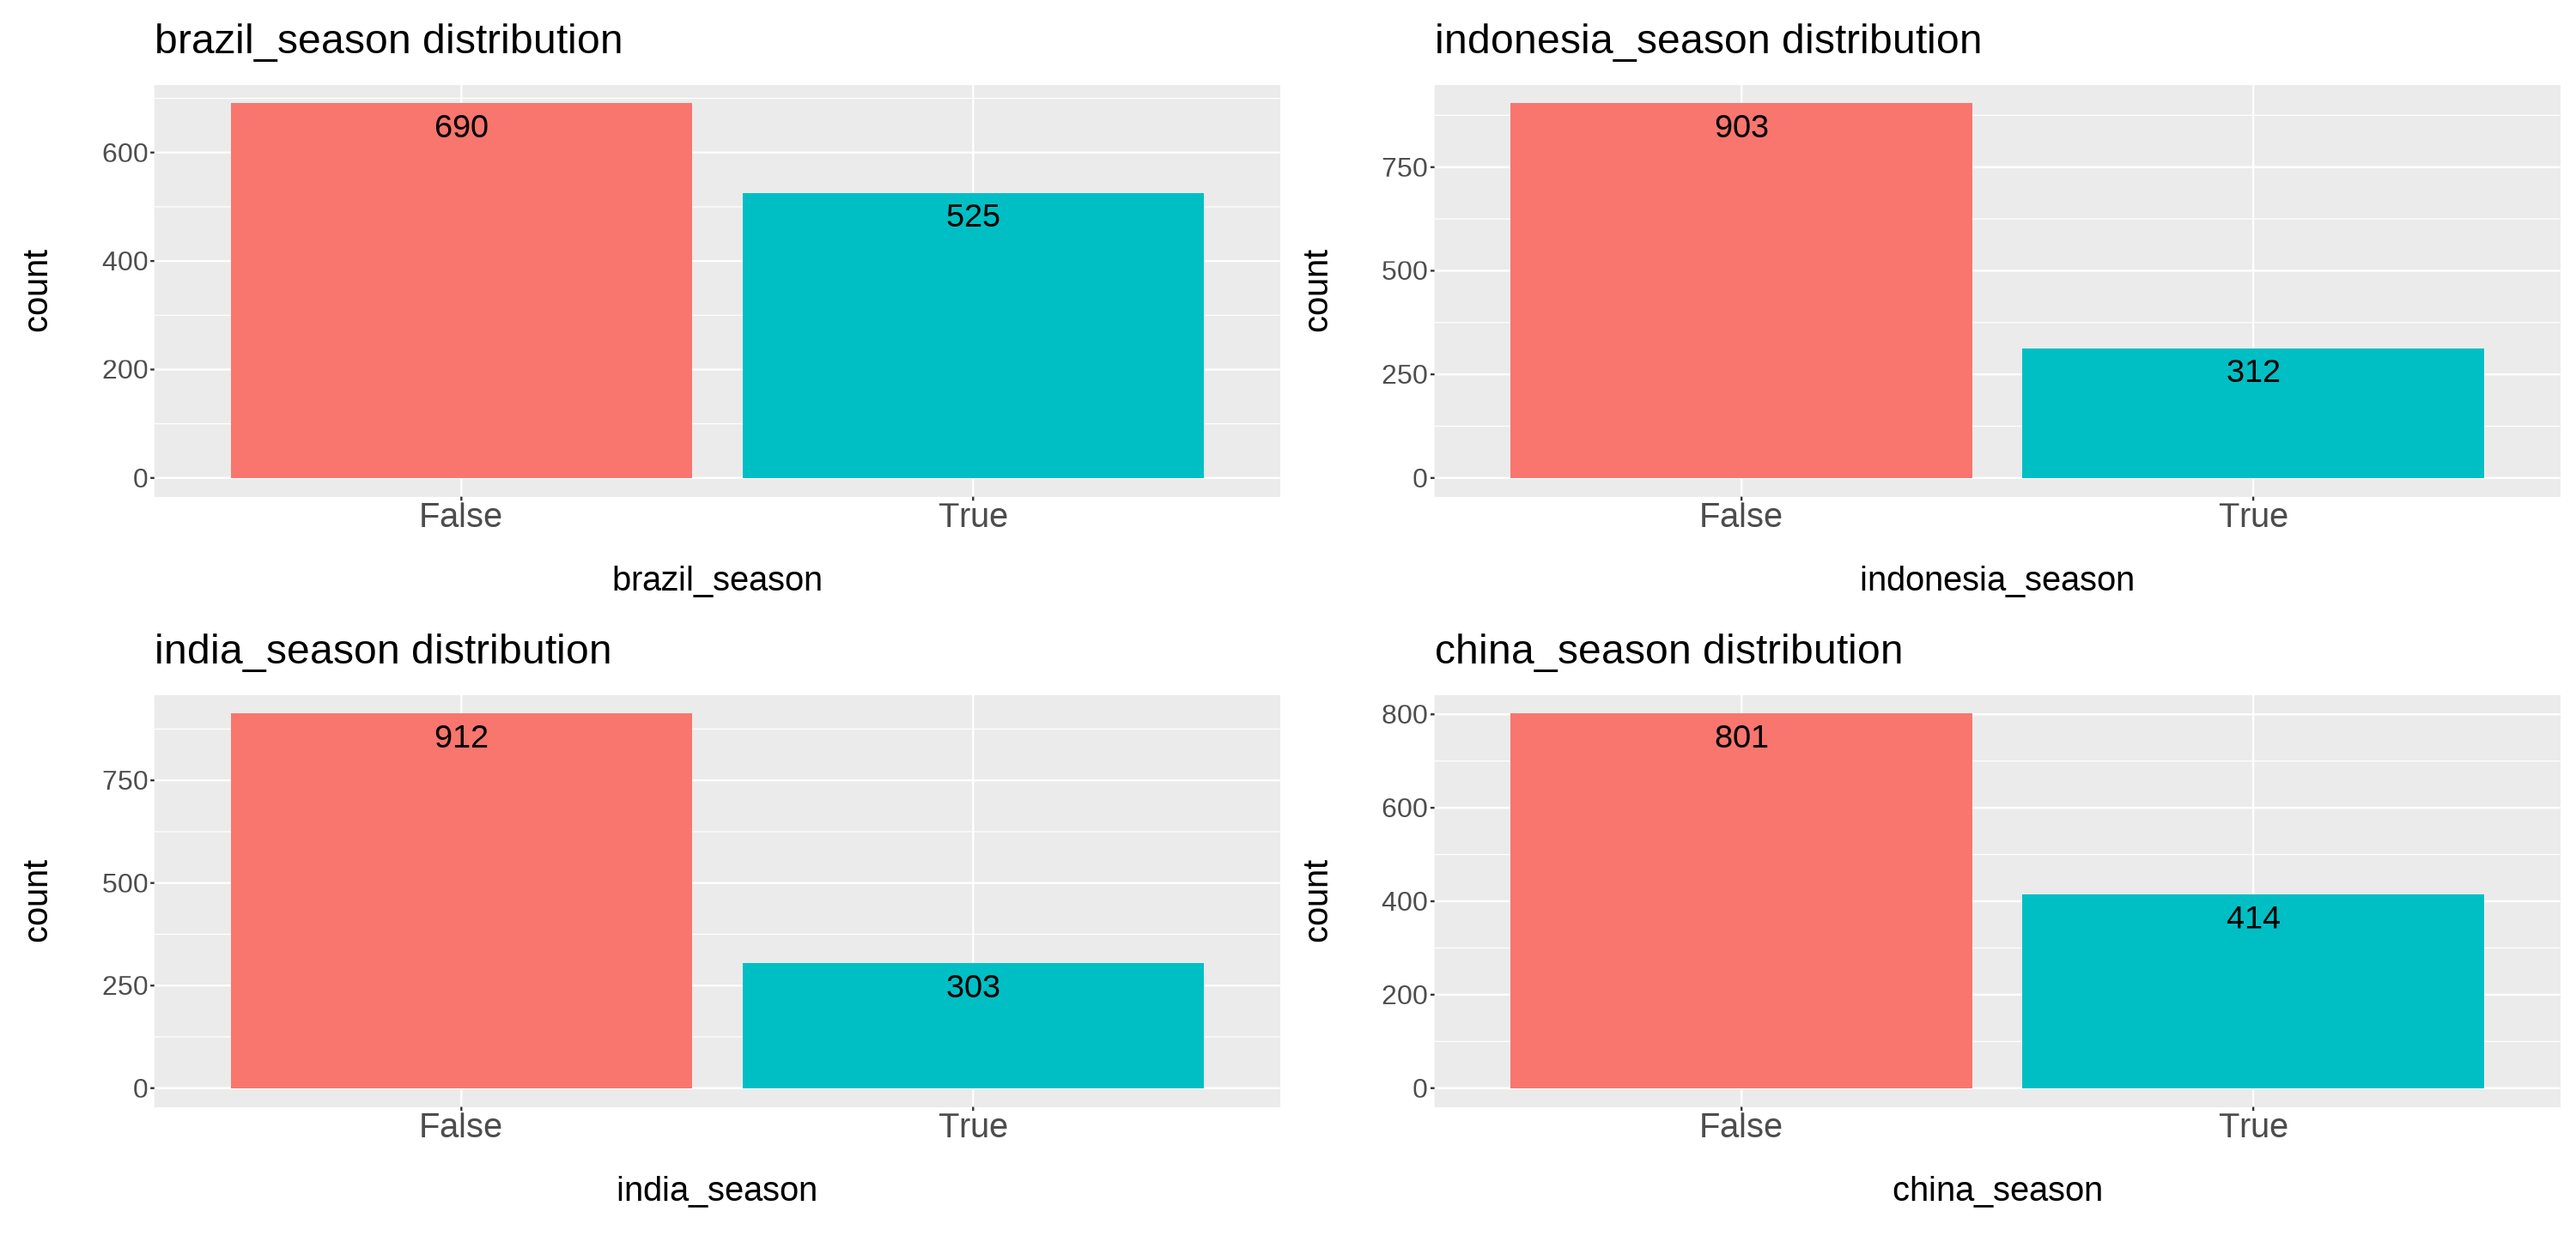

In [52]:
options(repr.plot.width=25, repr.plot.height=7);
df  %>% ggplot(aes(x = vietnam_season,fill=vietnam_season))+geom_bar(show.legend = FALSE)+ggtitle("vietnam_season distribution")+count_label+my_thems+
df  %>% ggplot(aes(x = p_color,fill=p_color))+geom_bar(show.legend = FALSE)+ggtitle("p_colordistribution")+count_label+my_thems
options(repr.plot.width=25, repr.plot.height=12);
df  %>% ggplot(aes(x = brazil_season,fill=brazil_season))+geom_bar(show.legend = FALSE)+ggtitle("brazil_season distribution")+count_label+my_thems+
df  %>% ggplot(aes(x = indonesia_season,fill=indonesia_season))+geom_bar(show.legend = FALSE)+ggtitle("indonesia_season distribution")+count_label+my_thems+
df  %>% ggplot(aes(x = india_season,fill=india_season))+geom_bar(show.legend = FALSE)+ggtitle("india_season distribution")+count_label+my_thems+
df  %>% ggplot(aes(x = china_season,fill=china_season))+geom_bar(show.legend = FALSE)+ggtitle("china_season distribution")+count_label+my_thems

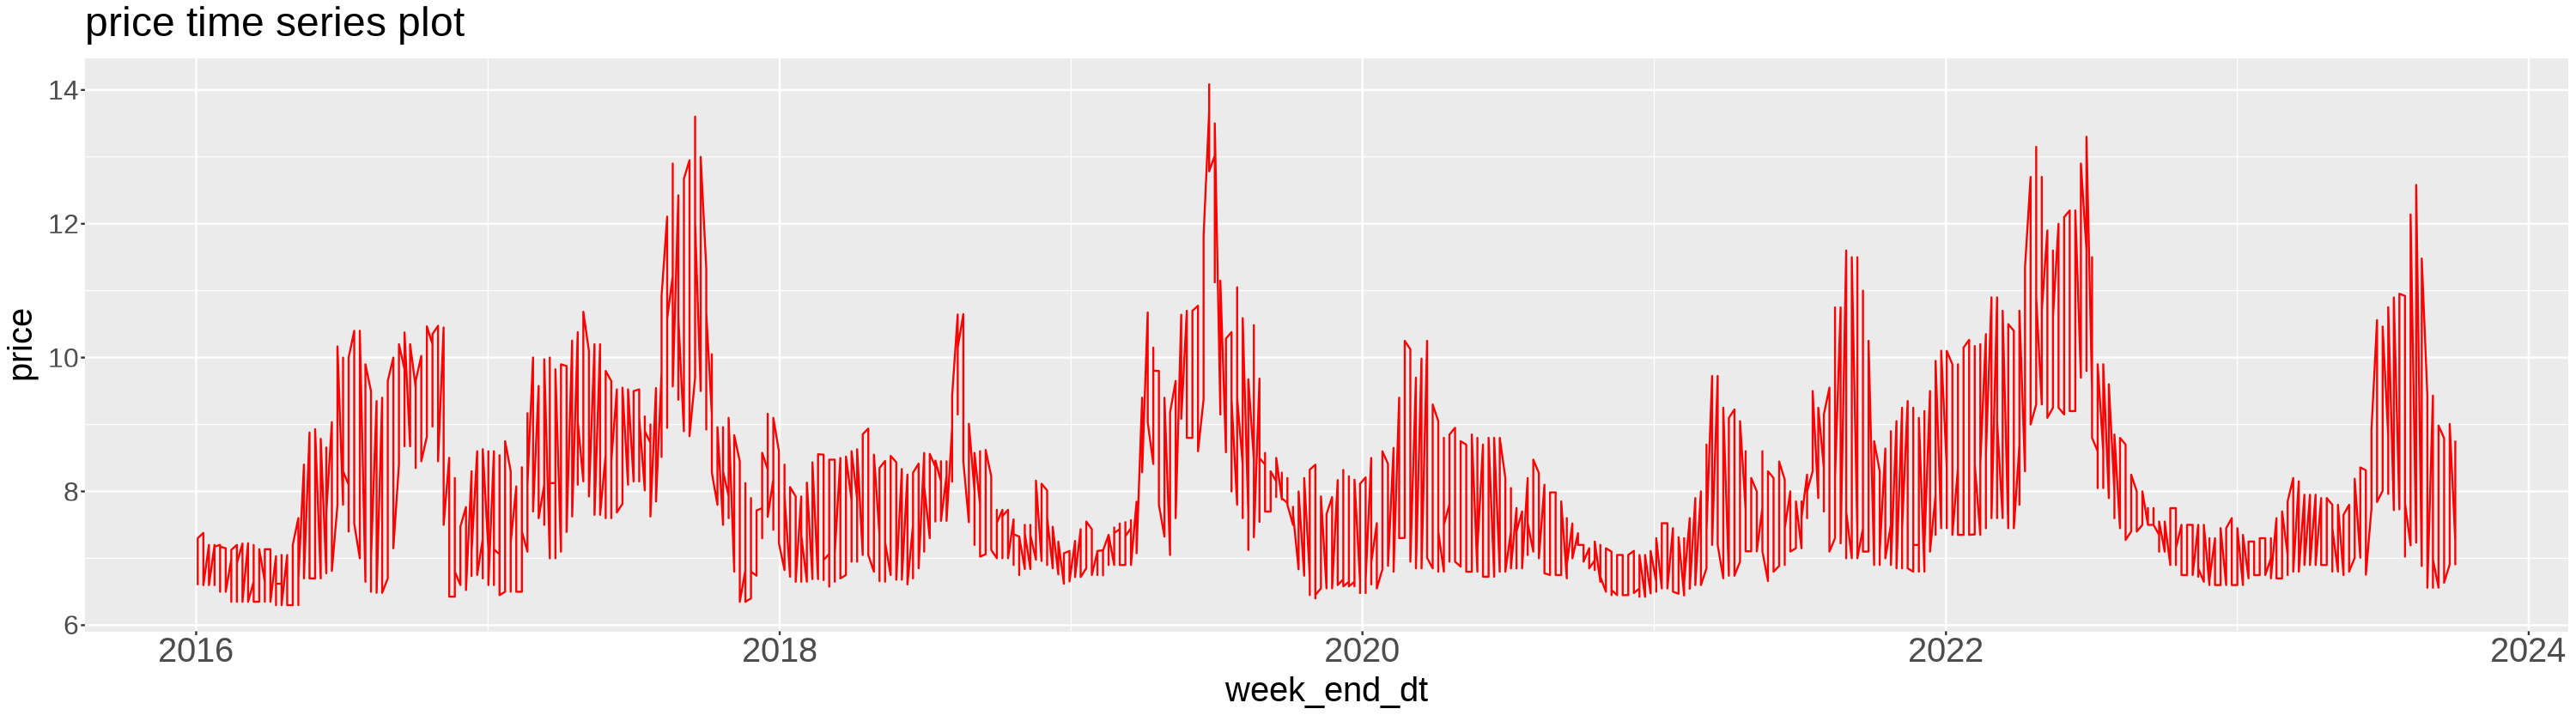

In [56]:
options(repr.plot.width=25, repr.plot.height=7);
df %>% ggplot(aes(x=week_end_dt,y = price))+geom_line(color="red")+ggtitle("price time series plot")+my_thems

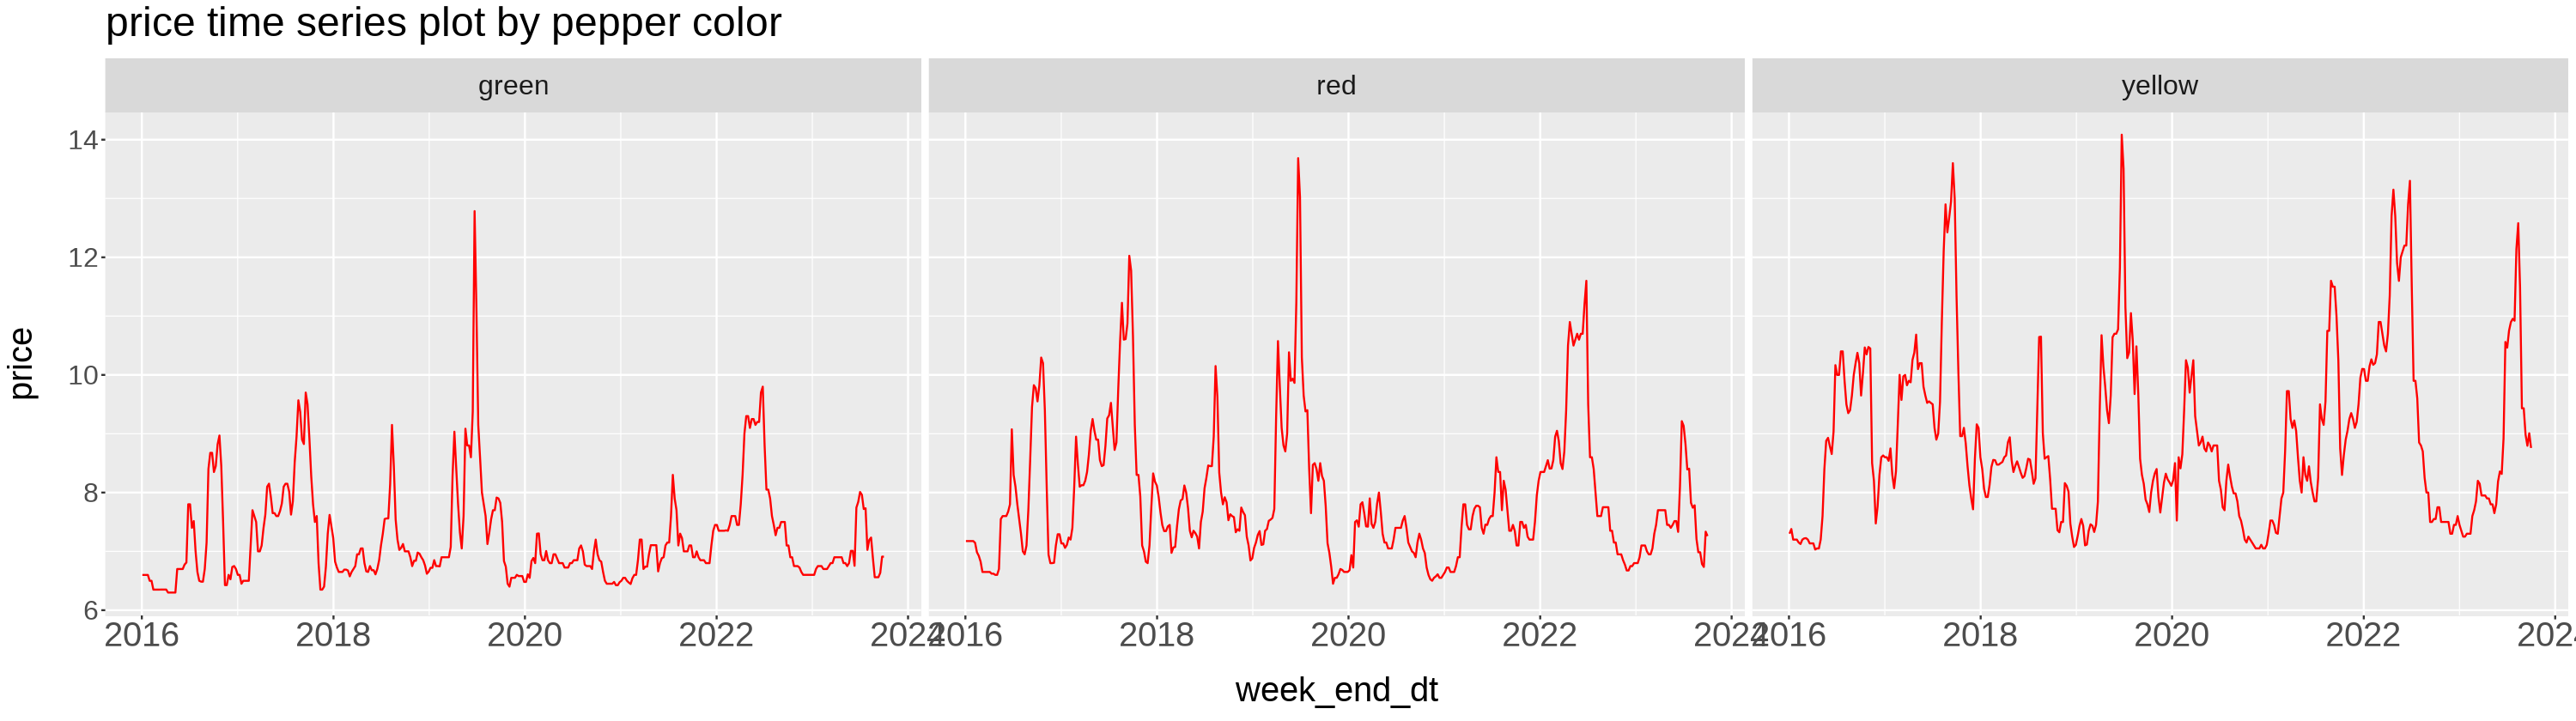

In [60]:
options(repr.plot.width=25, repr.plot.height=7);
df %>% ggplot(aes(x=week_end_dt,y = price))+geom_line(color="red")+ggtitle("price time series plot by pepper color")+facet_wrap(~p_color)+my_thems

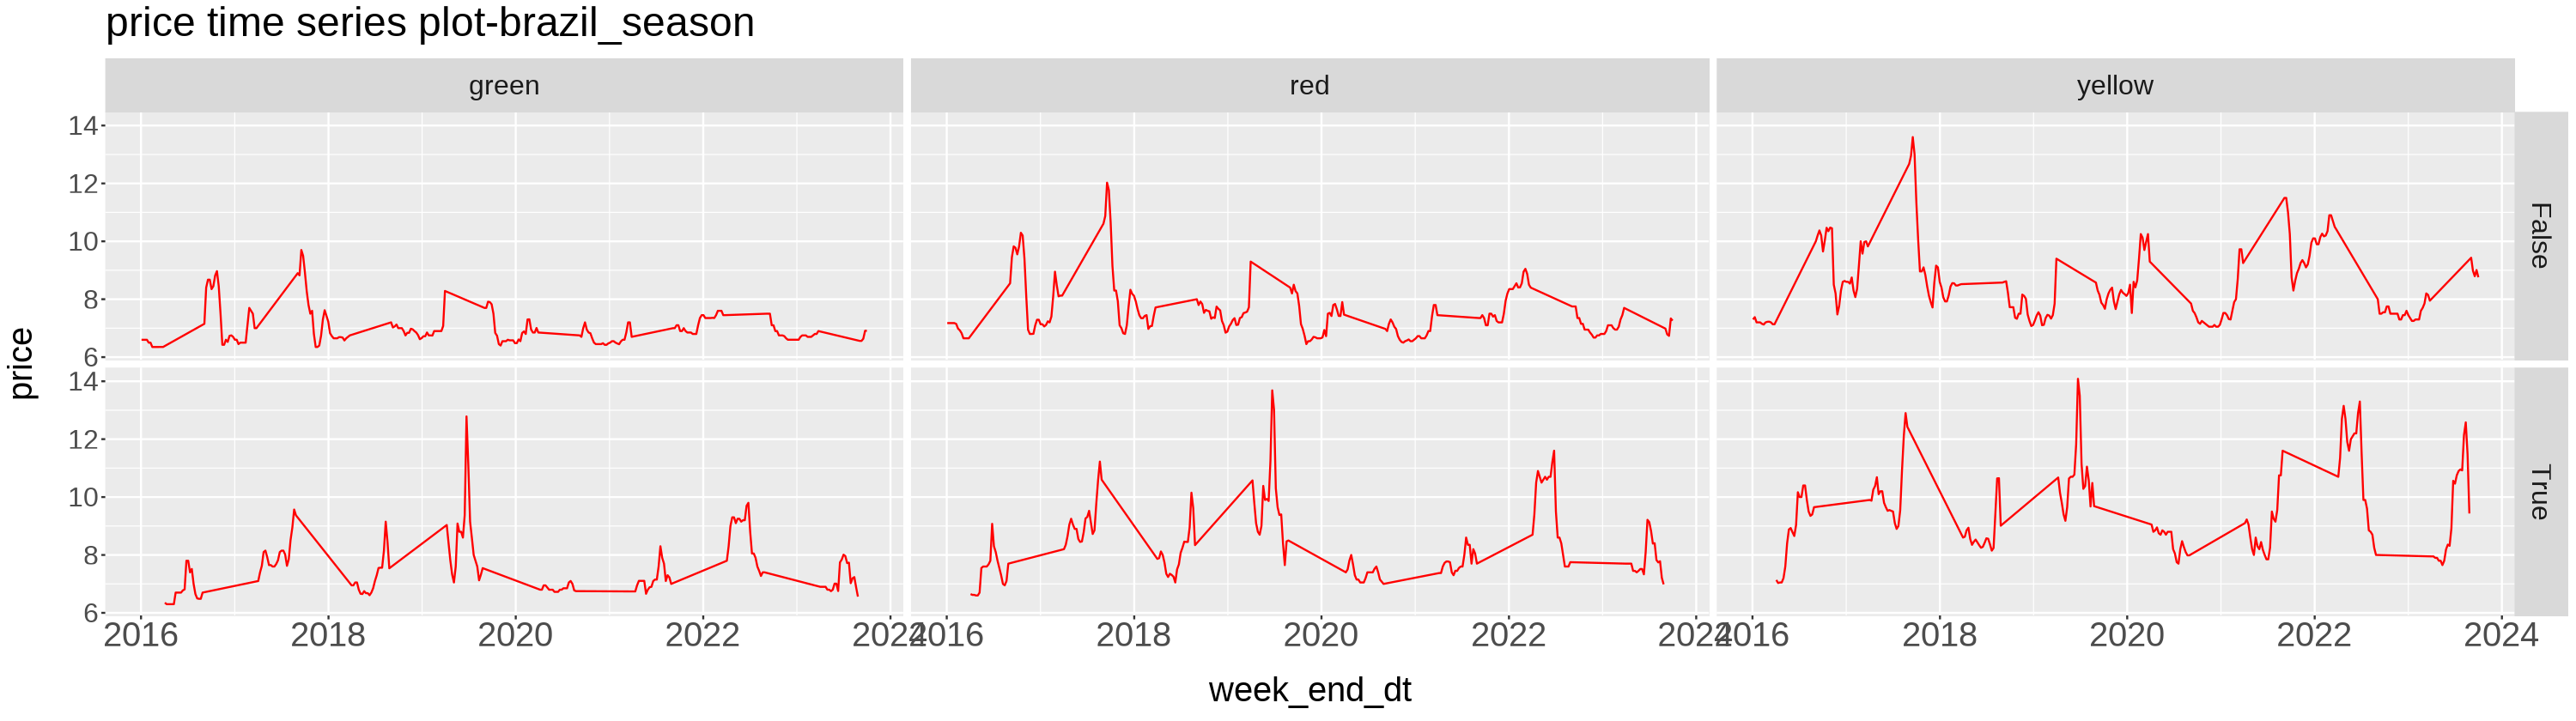

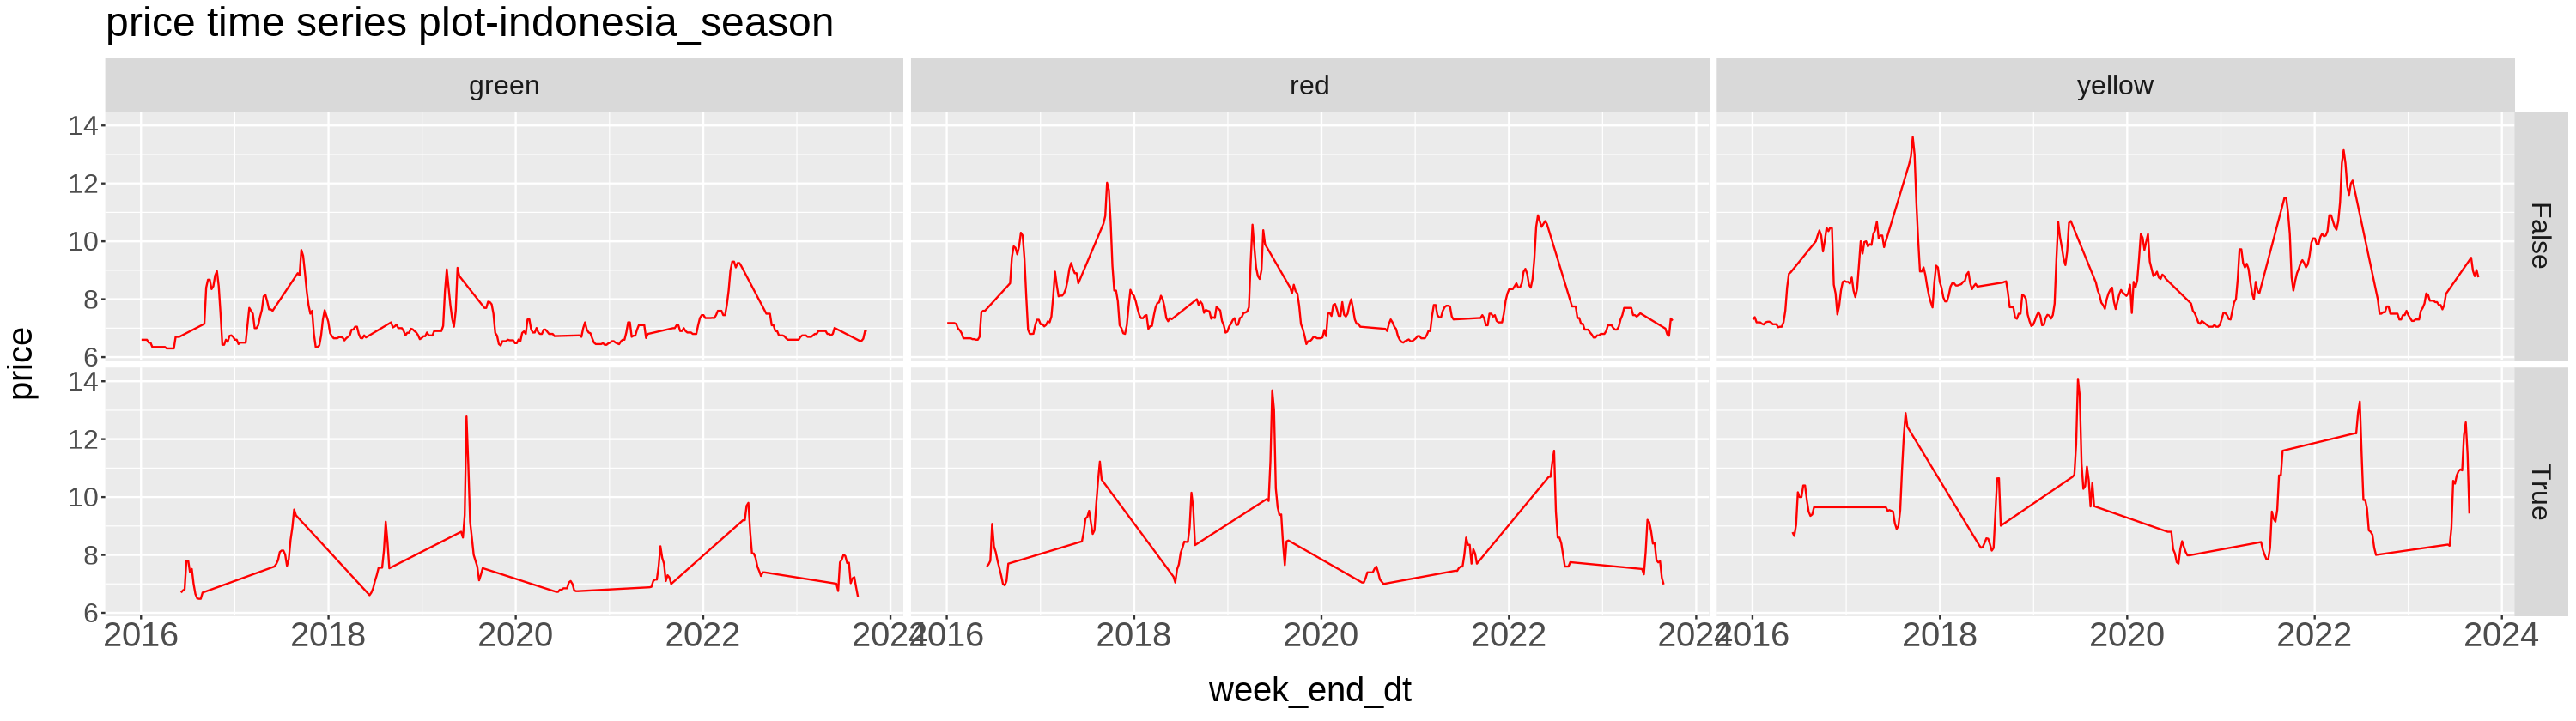

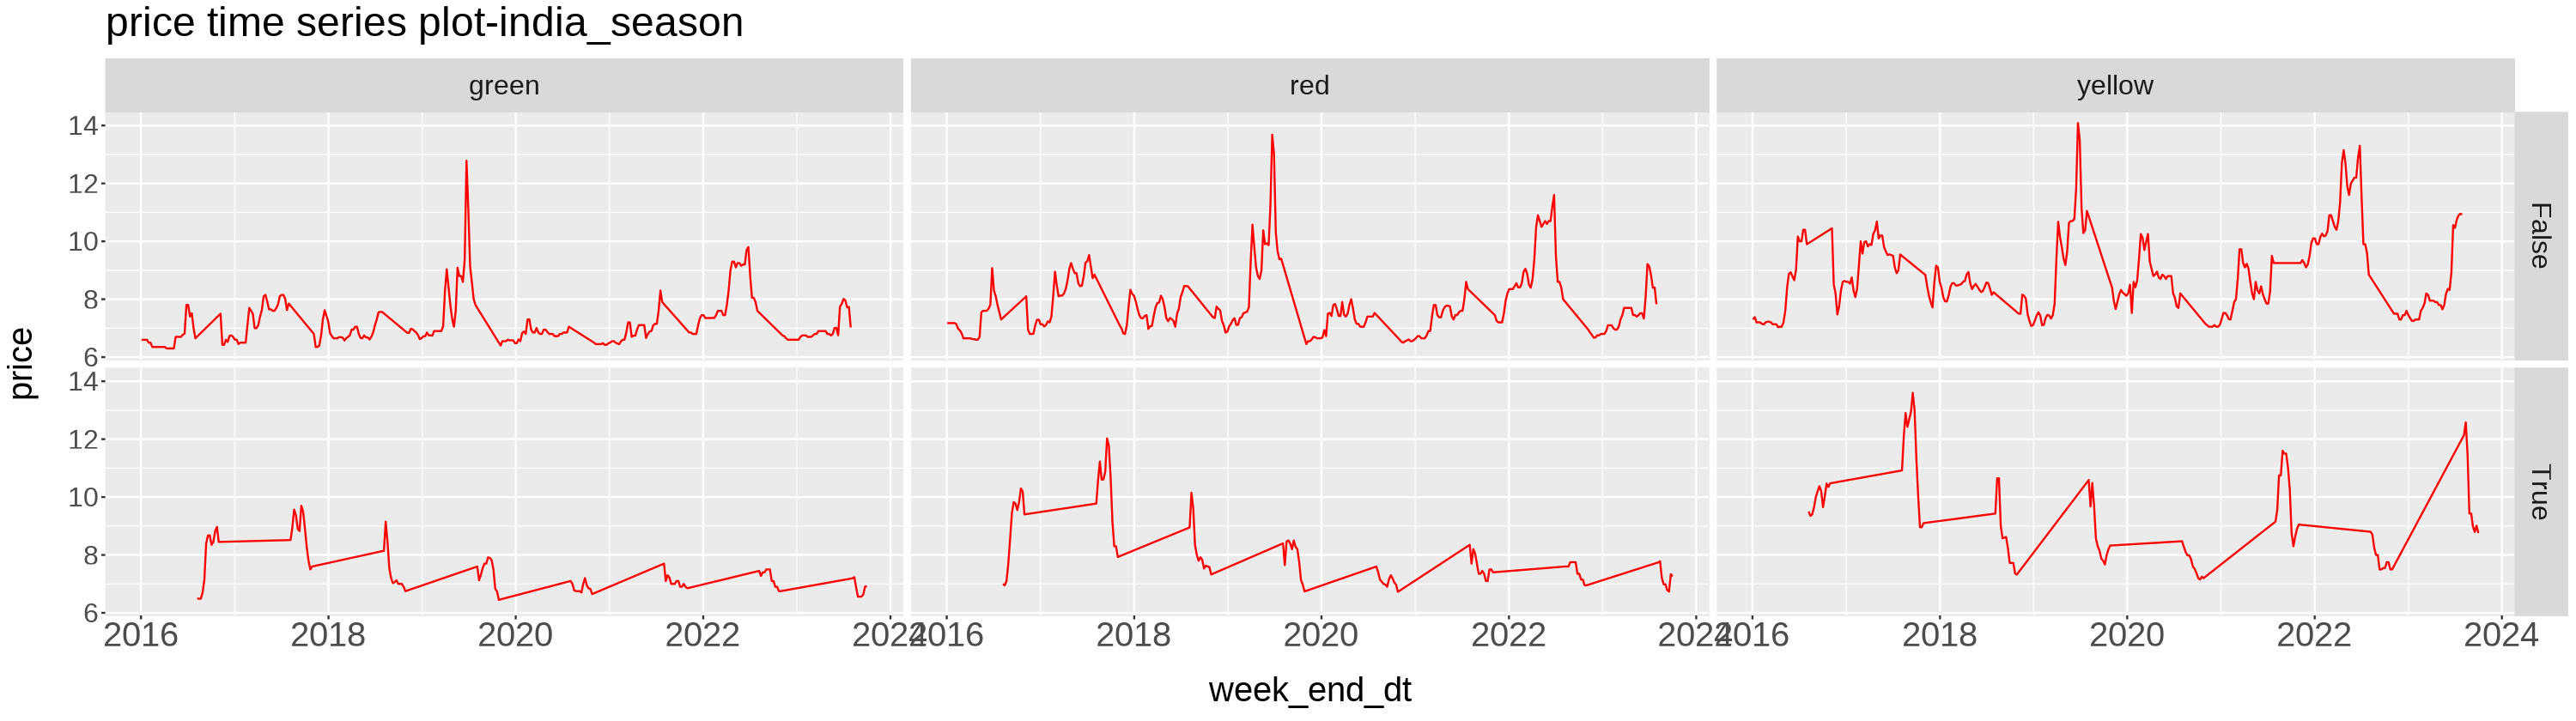

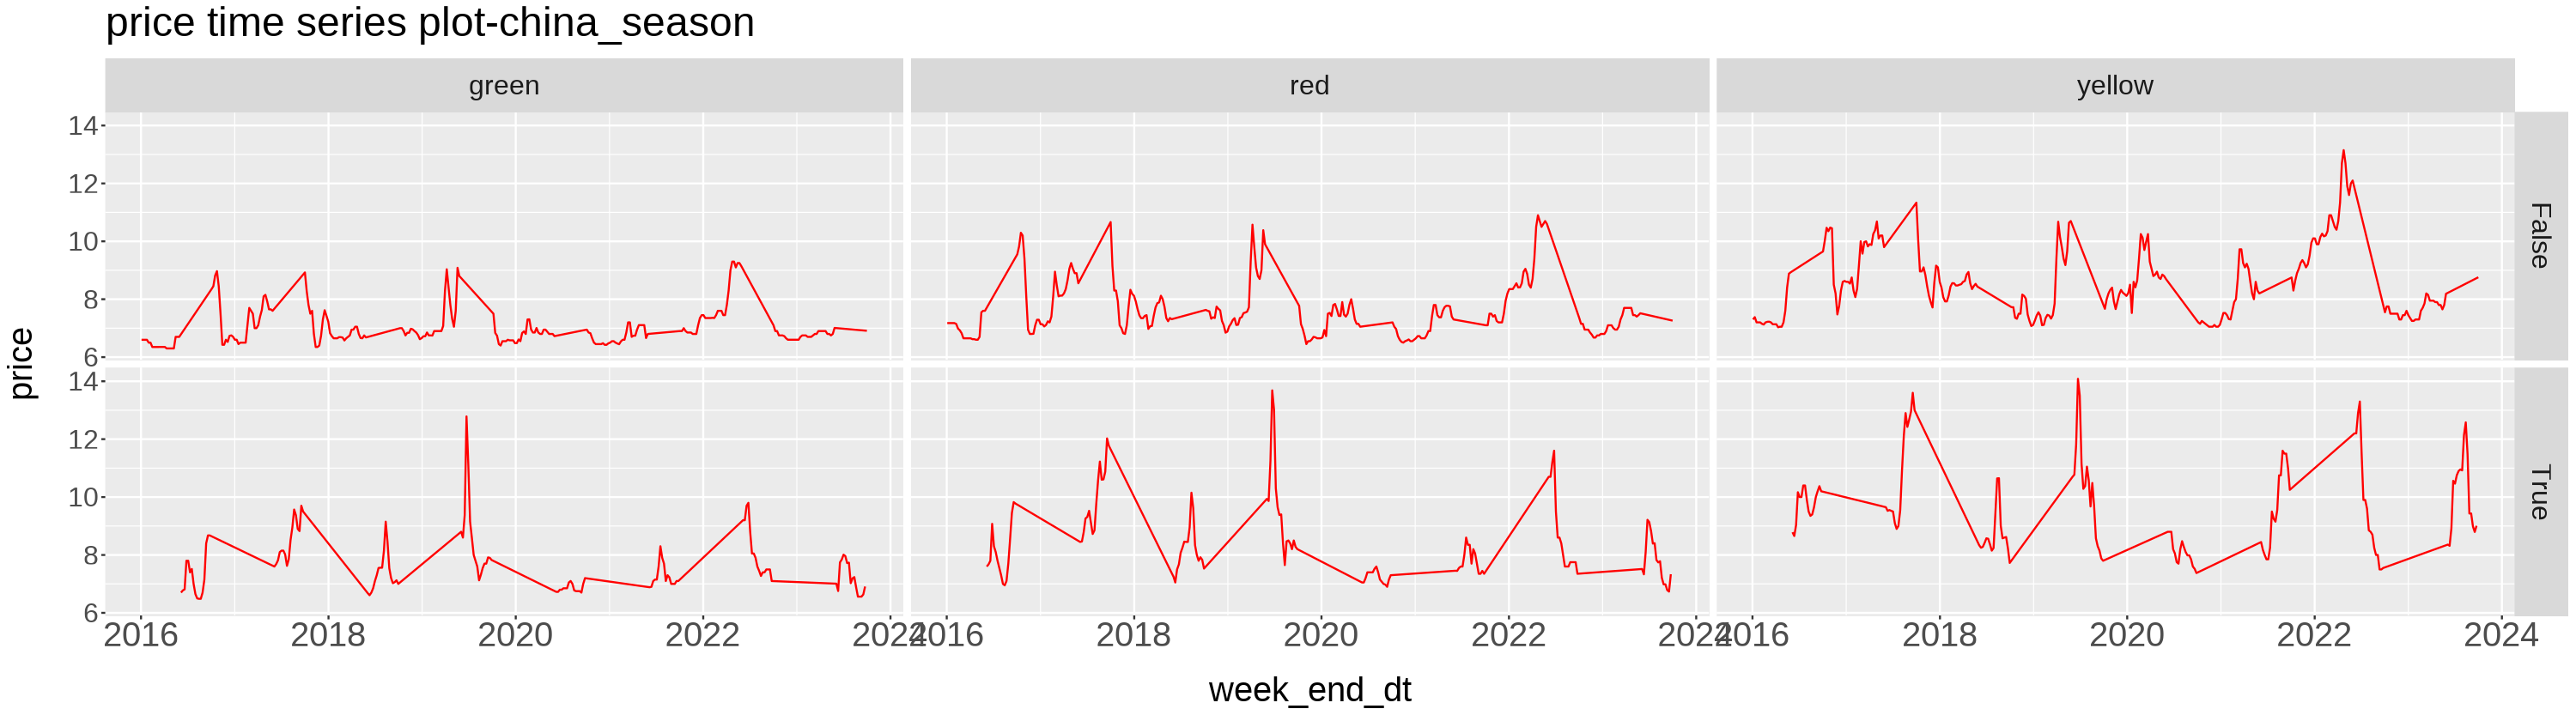

In [67]:
options(repr.plot.width=25, repr.plot.height=7);
df %>% ggplot(aes(x=week_end_dt,y = price))+geom_line(color="red")+ggtitle("price time series plot-brazil_season")+facet_grid(brazil_season~p_color)+my_thems
df %>% ggplot(aes(x=week_end_dt,y = price))+geom_line(color="red")+ggtitle("price time series plot-indonesia_season")+facet_grid(indonesia_season~p_color)+my_thems
df %>% ggplot(aes(x=week_end_dt,y = price))+geom_line(color="red")+ggtitle("price time series plot-india_season")+facet_grid(india_season~p_color)+my_thems
df %>% ggplot(aes(x=week_end_dt,y = price))+geom_line(color="red")+ggtitle("price time series plot-china_season")+facet_grid(china_season~p_color)+my_thems

---

*C.2. Interential Anaysis*

*normality check :*<br>
*normality Test: - A formal statistical test for normality - The null hypothesis states that the data follows a normal distribution shape*

In [12]:
df %>% select(price,total_volume,brazil,india,vietnam,indonesia,china)  %>%  normality()

vars         statistic p_value      sample
1 price        0.8771227 6.510843e-30 1215  
2 total_volume 0.9904102 4.008798e-07 1215  
3 brazil       0.8800461 1.288483e-29 1215  
4 india        0.5834130 5.488199e-47 1215  
5 vietnam      0.9962566 4.840132e-03 1215  
6 indonesia    0.6933827 2.527380e-42 1215  
7 china        0.4481965 1.738813e-51 1215

> *as the pvalue is less than 0.05 ---> we can reject the null hypothesis that states the data follows a normal distribution shape, and accept the alternative hypothesis*

---

*C.2.1 Numeric Analysis*

* *Mann-Whitney U Test -for features that have 2 categories :
equivelent to wilcox.test() wilcox rank sum test with continuity correction,better than wilcox sighned rank exct test(that used when variables are paired)*

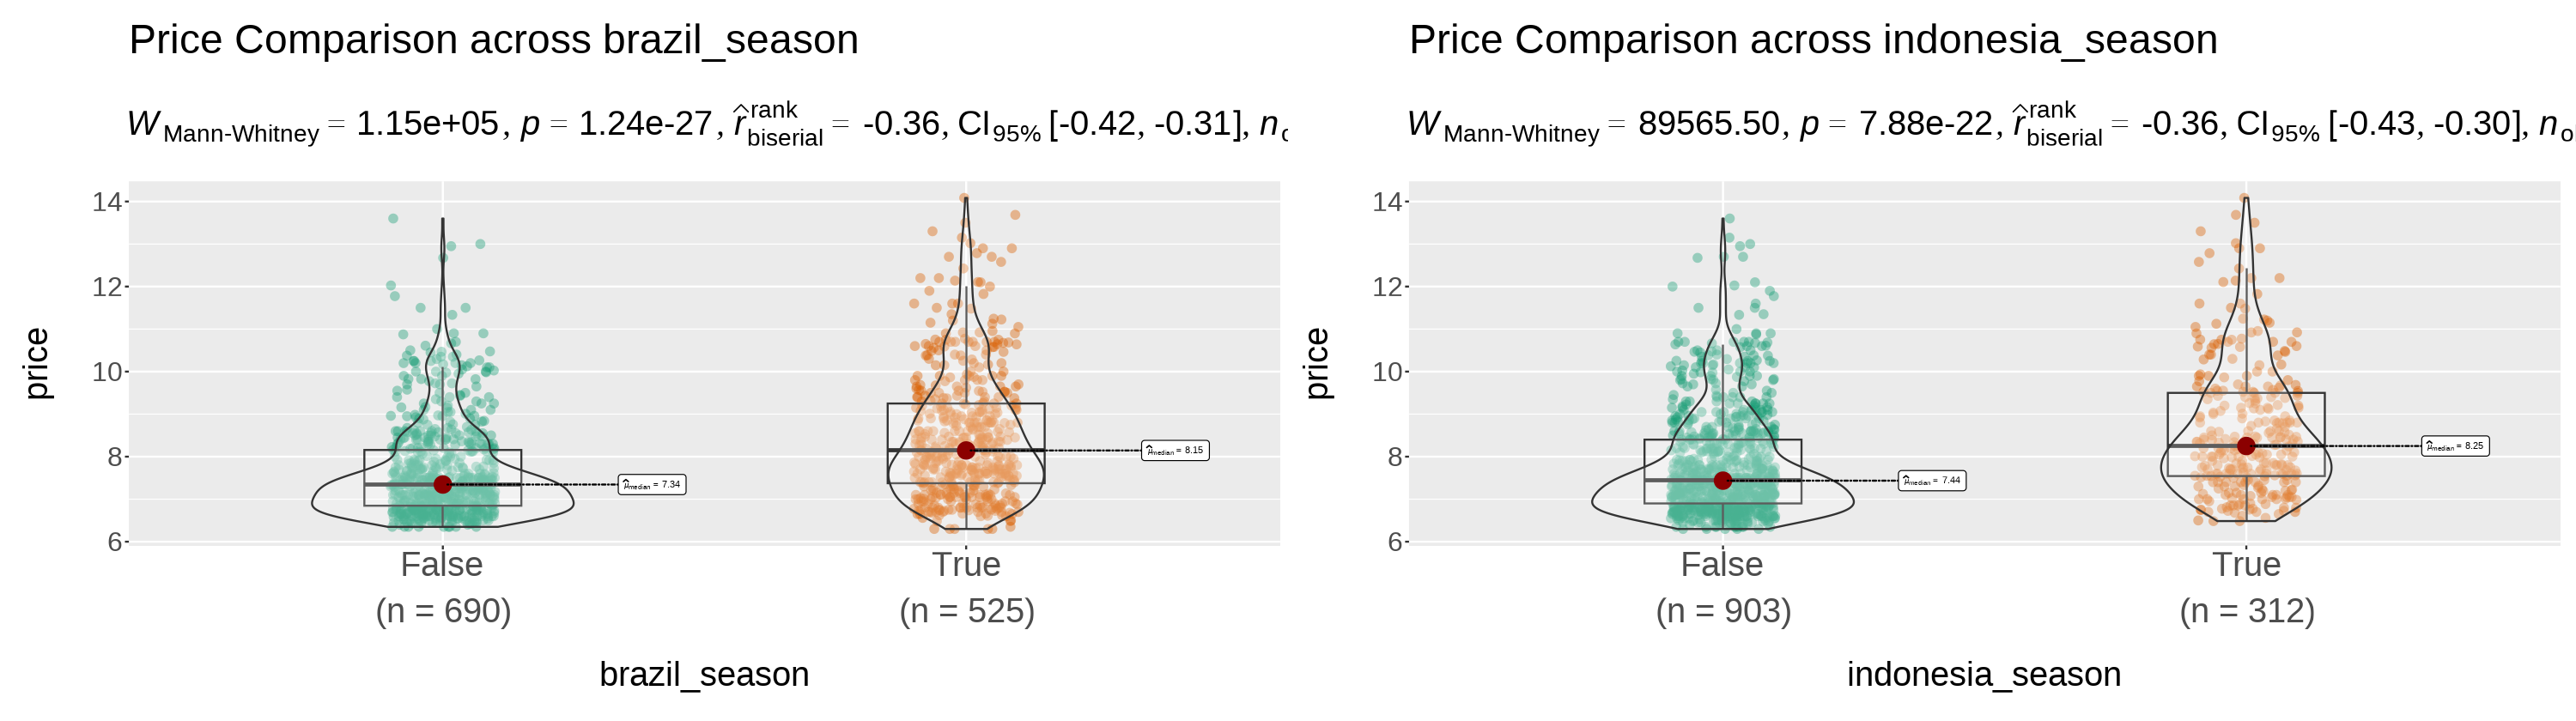

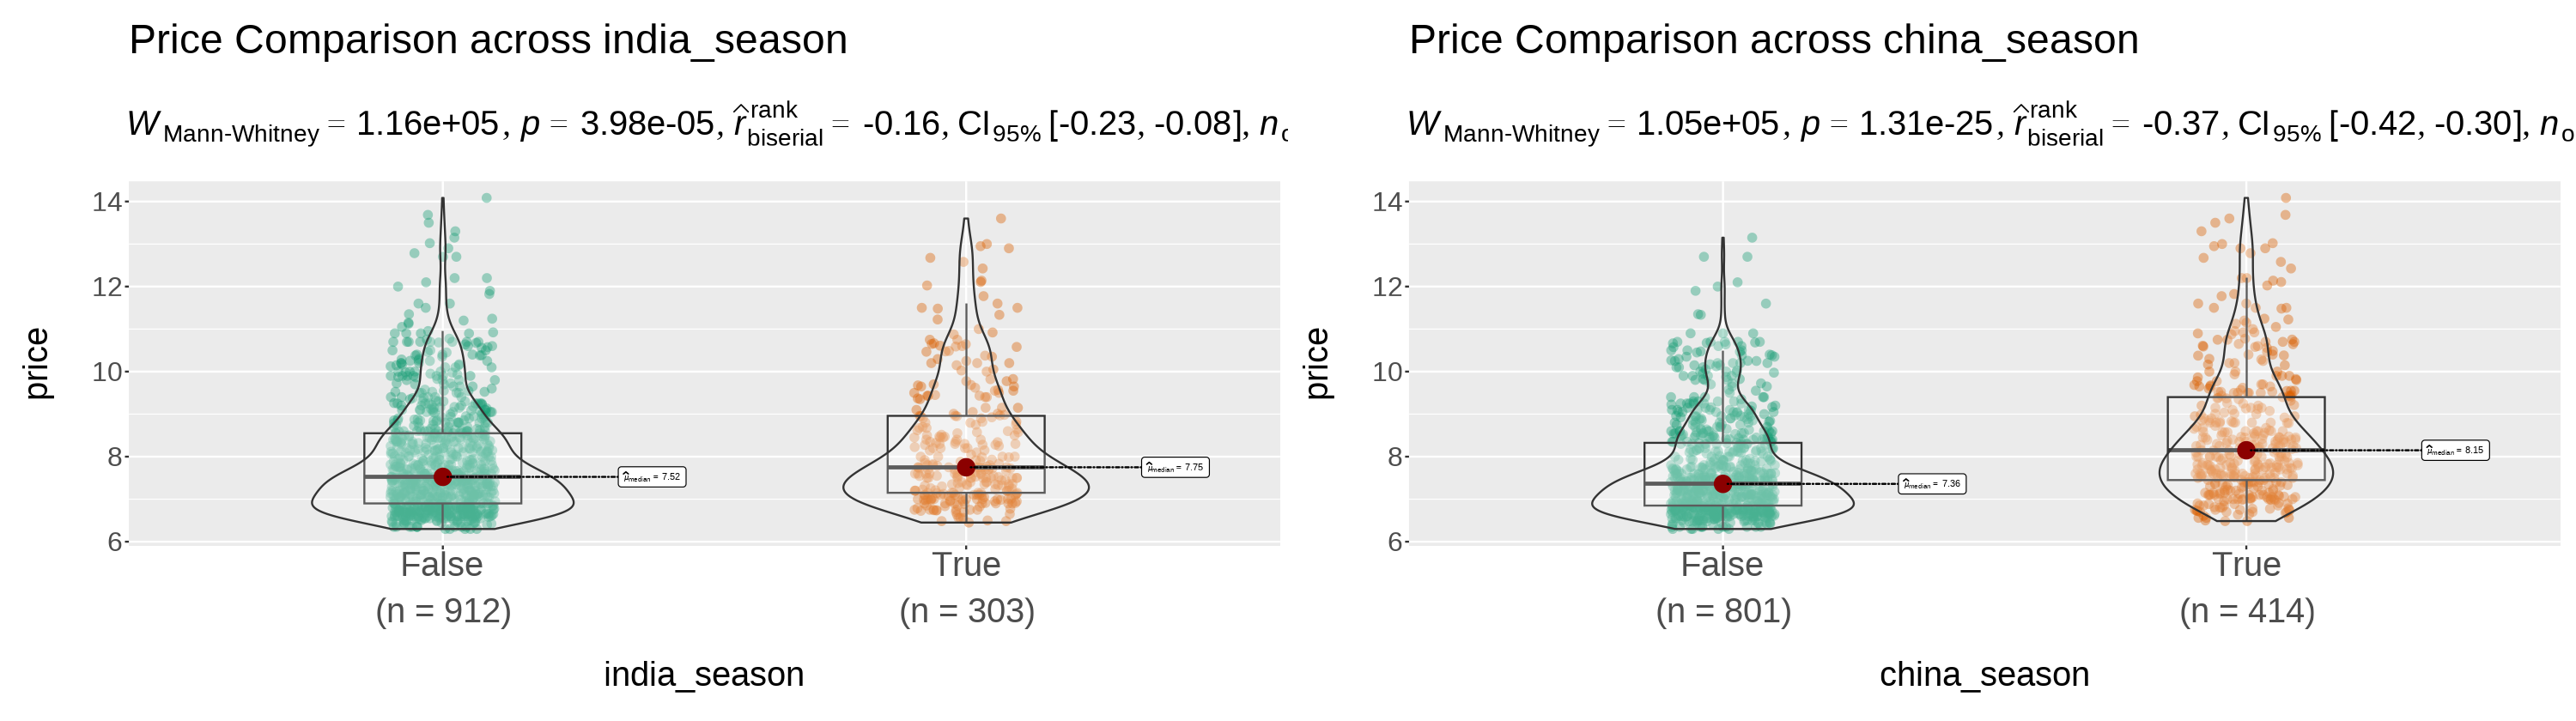

In [23]:
options(repr.plot.width=25, repr.plot.height=7);
df %>% ggbetweenstats(x=brazil_season,y=price,type = "nonparamertic",
ggtheme = ggplot2::theme_gray(),title = "Price Comparison across brazil_season",
ggsignif.args = list(textsize = 3, tip_length = 0.01, na.rm = TRUE))+my_thems+

df %>% ggbetweenstats(x=indonesia_season,y=price,type = "nonparamertic",
ggtheme = ggplot2::theme_gray(),title = "Price Comparison across indonesia_season",
ggsignif.args = list(textsize = 3, tip_length = 0.01, na.rm = TRUE))+my_thems

df %>% ggbetweenstats(x=india_season,y=price,type = "nonparamertic",
ggtheme = ggplot2::theme_gray(),title = "Price Comparison across india_season",
ggsignif.args = list(textsize = 3, tip_length = 0.01, na.rm = TRUE))+my_thems+

df %>% ggbetweenstats(x=china_season,y=price,type = "nonparamertic",
ggtheme = ggplot2::theme_gray(),title = "Price Comparison across china_season",
ggsignif.args = list(textsize = 3, tip_length = 0.01, na.rm = TRUE))+my_thems

> *From the above graphs we can get that :* 

> *1. on brazil season the pvalue is 1.24e-27 --> less than 0.05 --> there is difference in the data distribution between brazil seasons with confidence intenrval between [-0.42,.-0.31]<br>this difference can be determined if it is large or small by interpreting the rank biserial value which is -0.36*

> *2. on indonesia season the pvalue is 7.88e-22 --> less than 0.05 --> there is difference in the data distribution between indonesia seasons with confidence intenrval between [-0.43,.-0.30]<br>this difference can be determined if it is large or small by interpreting the rank biserial value which is -0.36*

> *3. on india season the pvalue is 3.98e-05  --> less than 0.05 --> there is difference in the data distribution between india seasons with confidence intenrval between [-0.23,.-0.8]<br>this difference can be determined if it is large or small by interpreting the rank biserial value which is -0.16*

> *4. on china season the pvalue is 1.31e-25  --> less than 0.05 --> there is difference in the data distribution between china seasons with confidence intenrval between [-0.42,.-0.30]<br>this difference can be determined if it is large or small by interpreting the rank biserial value which is -0.37*


In [69]:
print(paste("difference in the data distribution between brazil seasons with rank_biserial = -0.36 is",interpret_rank_biserial(-0.36)))
print(paste("difference in the data distribution between indonesia seasons with rank_biserial = -0.36 is",interpret_rank_biserial(-0.36)))
print(paste("difference in the data distribution between india seasons with rank_biserial = -0.16 is",interpret_rank_biserial(-0.16)))
print(paste("difference in the data distribution between china seasons with rank_biserial = -0.37 is",interpret_rank_biserial(-0.37)))

[1] "difference in the data distribution between brazil seasons with rank_biserial = -0.36 is large"
[1] "difference in the data distribution between indonesia seasons with rank_biserial = -0.36 is large"
[1] "difference in the data distribution between india seasons with rank_biserial = -0.16 is small"
[1] "difference in the data distribution between china seasons with rank_biserial = -0.37 is large"


* *kruskal wallis Test -for features that have more than 3 categories :*<br>*describe:*<br>*1. whether at least on group is different from other groups<br>2. and between which groups this difference is*

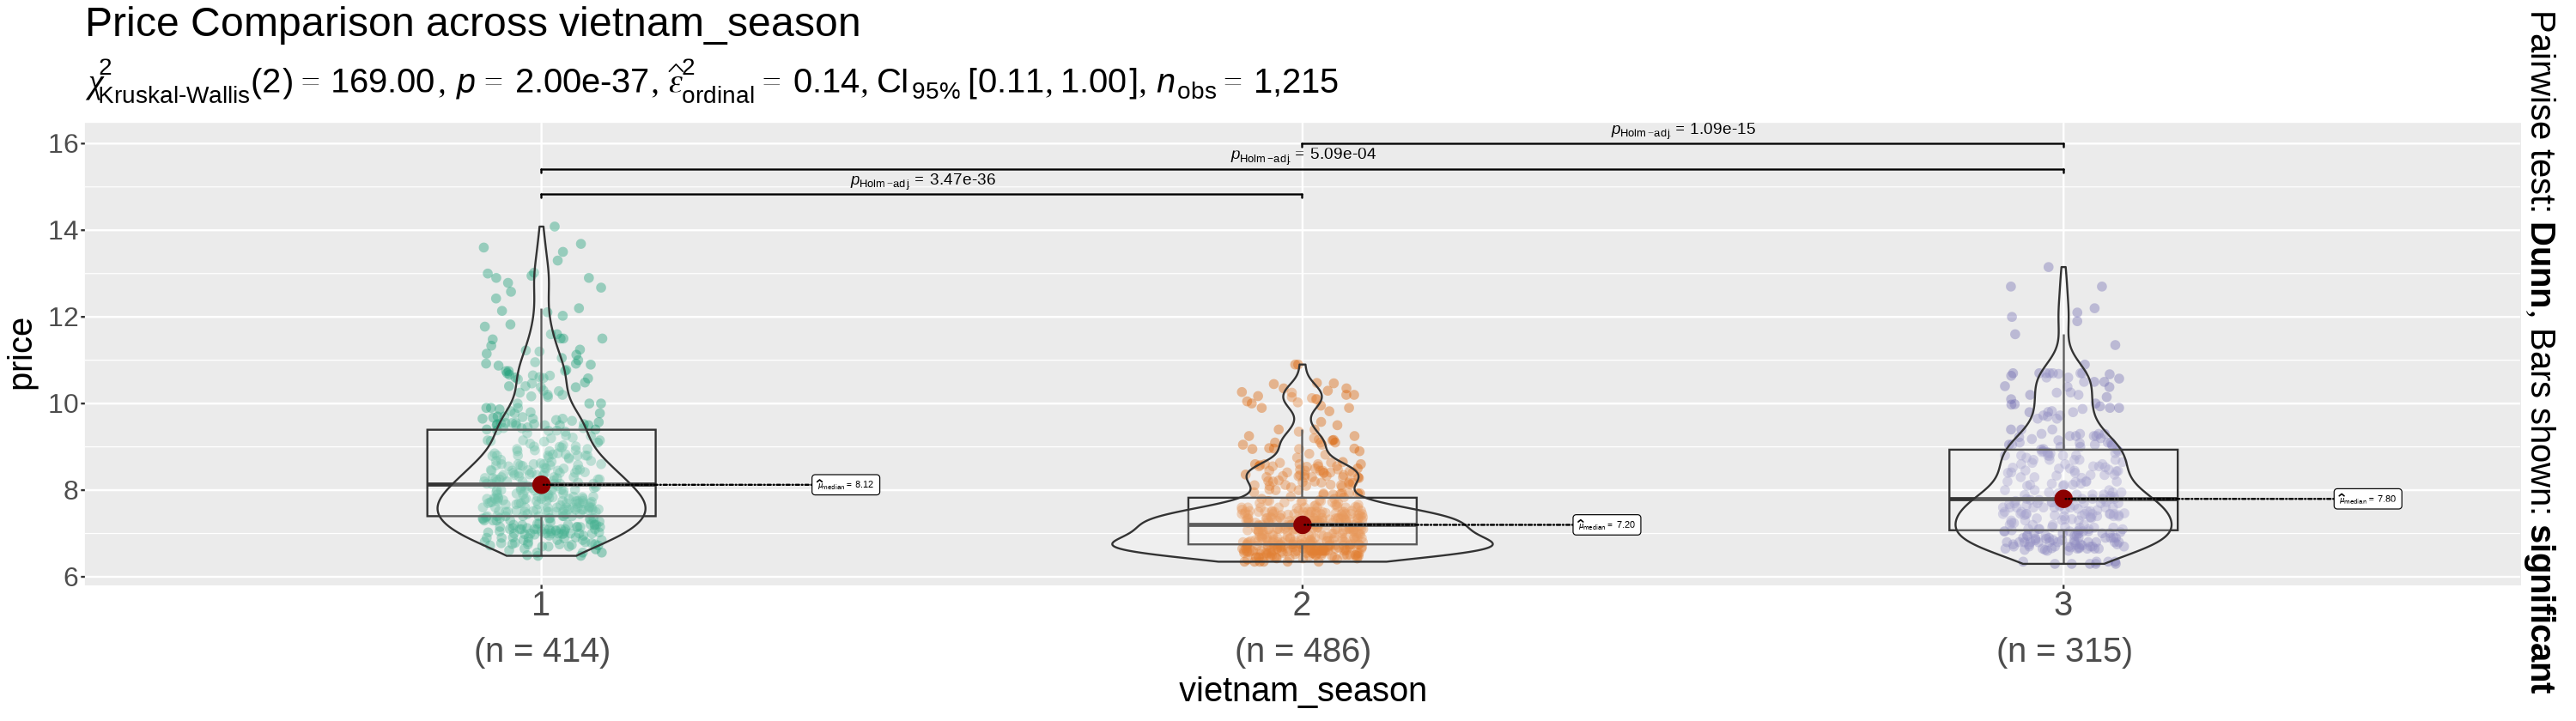

In [25]:
df %>% ggbetweenstats(x=vietnam_season,y=price,type = "nonparamertic",
ggtheme = ggplot2::theme_gray(),title = "Price Comparison across vietnam_season",
ggsignif.args = list(textsize = 5, tip_length = 0.01, na.rm = TRUE))+my_thems

> *From the above graphs we can get that :* 

> *The pvalue is 2.00e-37 --> less than 0.05 --> there is difference in the data distribution between vietnam_season seasons with confidence intenrval between [0.11,1]<br>this difference can be determined if it is large or small by interpreting the epsilon_squared value which is 0.14*

In [71]:
print(paste("difference in the data distribution between brazil seasons with epsilon_squared = -0.36 is",interpret_epsilon_squared(0.14)))

[1] "difference in the data distribution between brazil seasons with epsilon_squared = -0.36 is large"


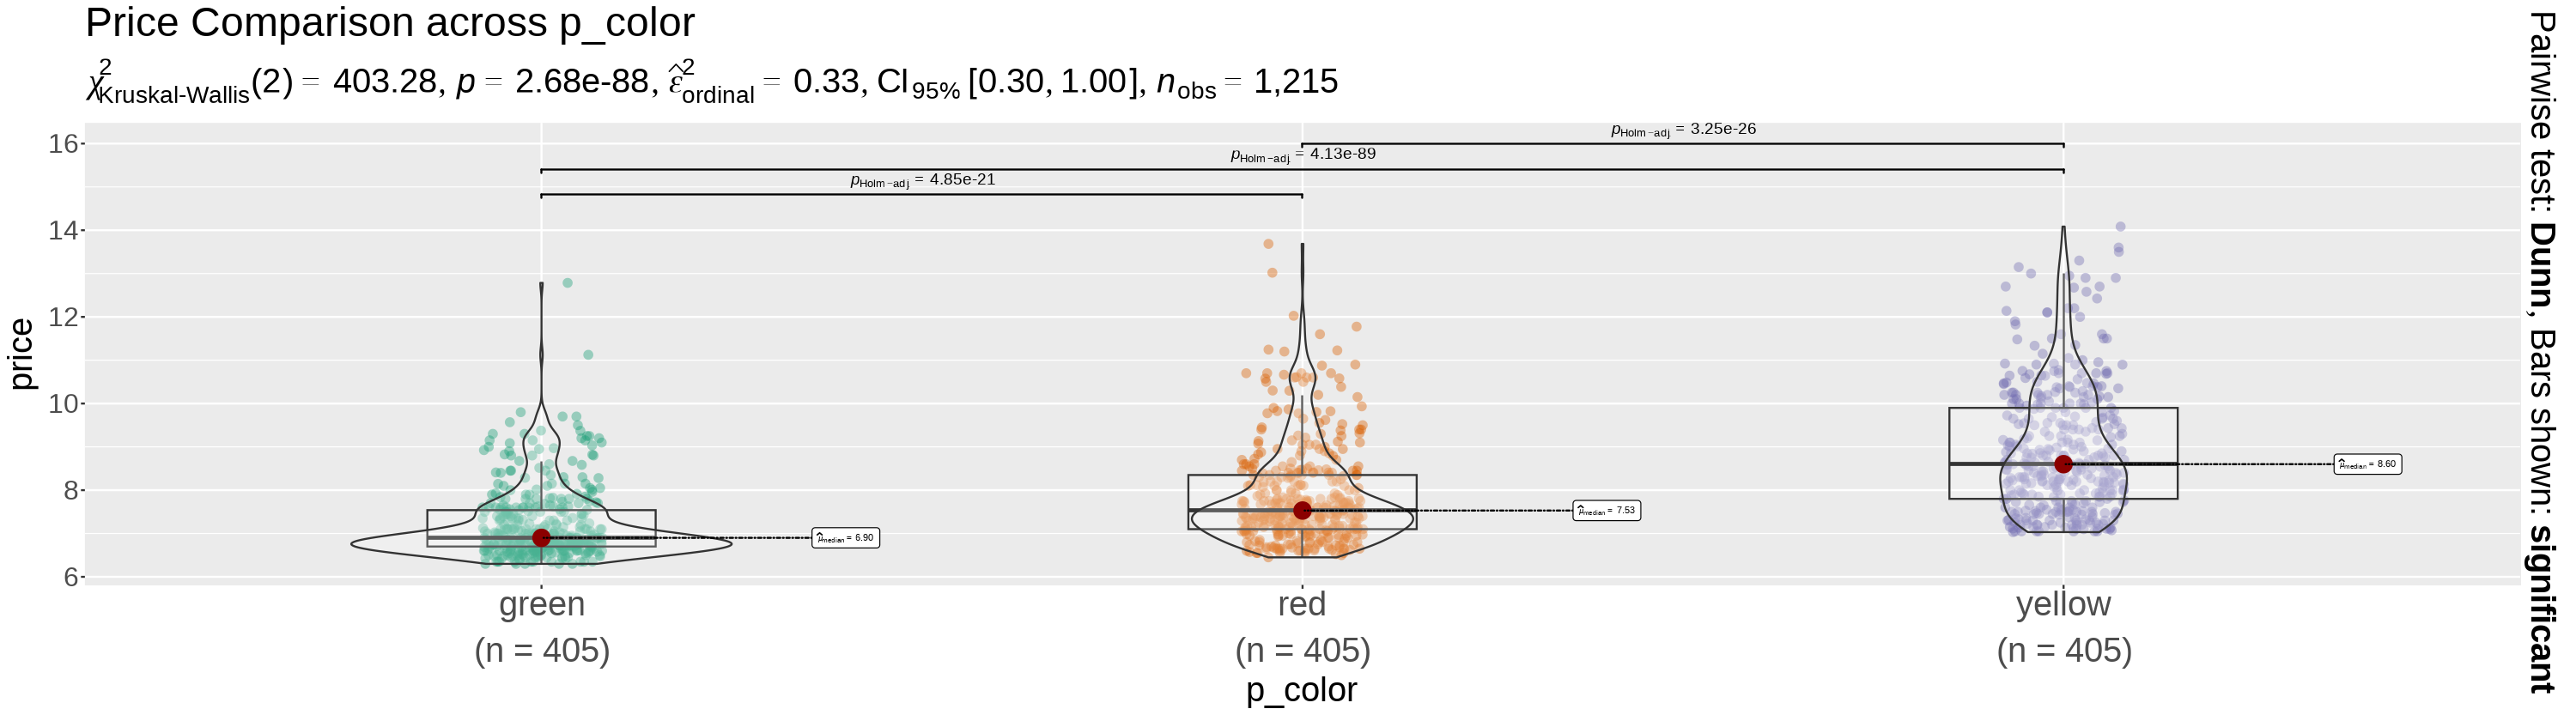

In [26]:
df %>% ggbetweenstats(x=p_color,y=price,type = "nonparamertic",
ggtheme = ggplot2::theme_gray(),title = "Price Comparison across p_color",
ggsignif.args = list(textsize = 5, tip_length = 0.01, na.rm = TRUE))+my_thems

> *From the above graphs we can get that :* 

> *The pvalue is 2.68e-88 --> less than 0.05 --> there is difference in the data distribution between p_color groups with confidence intenrval between [0.30,1]<br>this difference can be determined if it is large or small by interpreting the epsilon_squared value which is 0.33*

In [72]:
print(paste("difference in the data distribution between brazil seasons with epsilon_squared = -0.36 is",interpret_epsilon_squared(0.33)))

[1] "difference in the data distribution between brazil seasons with epsilon_squared = -0.36 is large"


---

*C.2.2 Categorical Features Analysis*

* *We have two categorical fetaures : vietnam_season,p_color,brazil_season,indonesia_season,india_season,china_season*

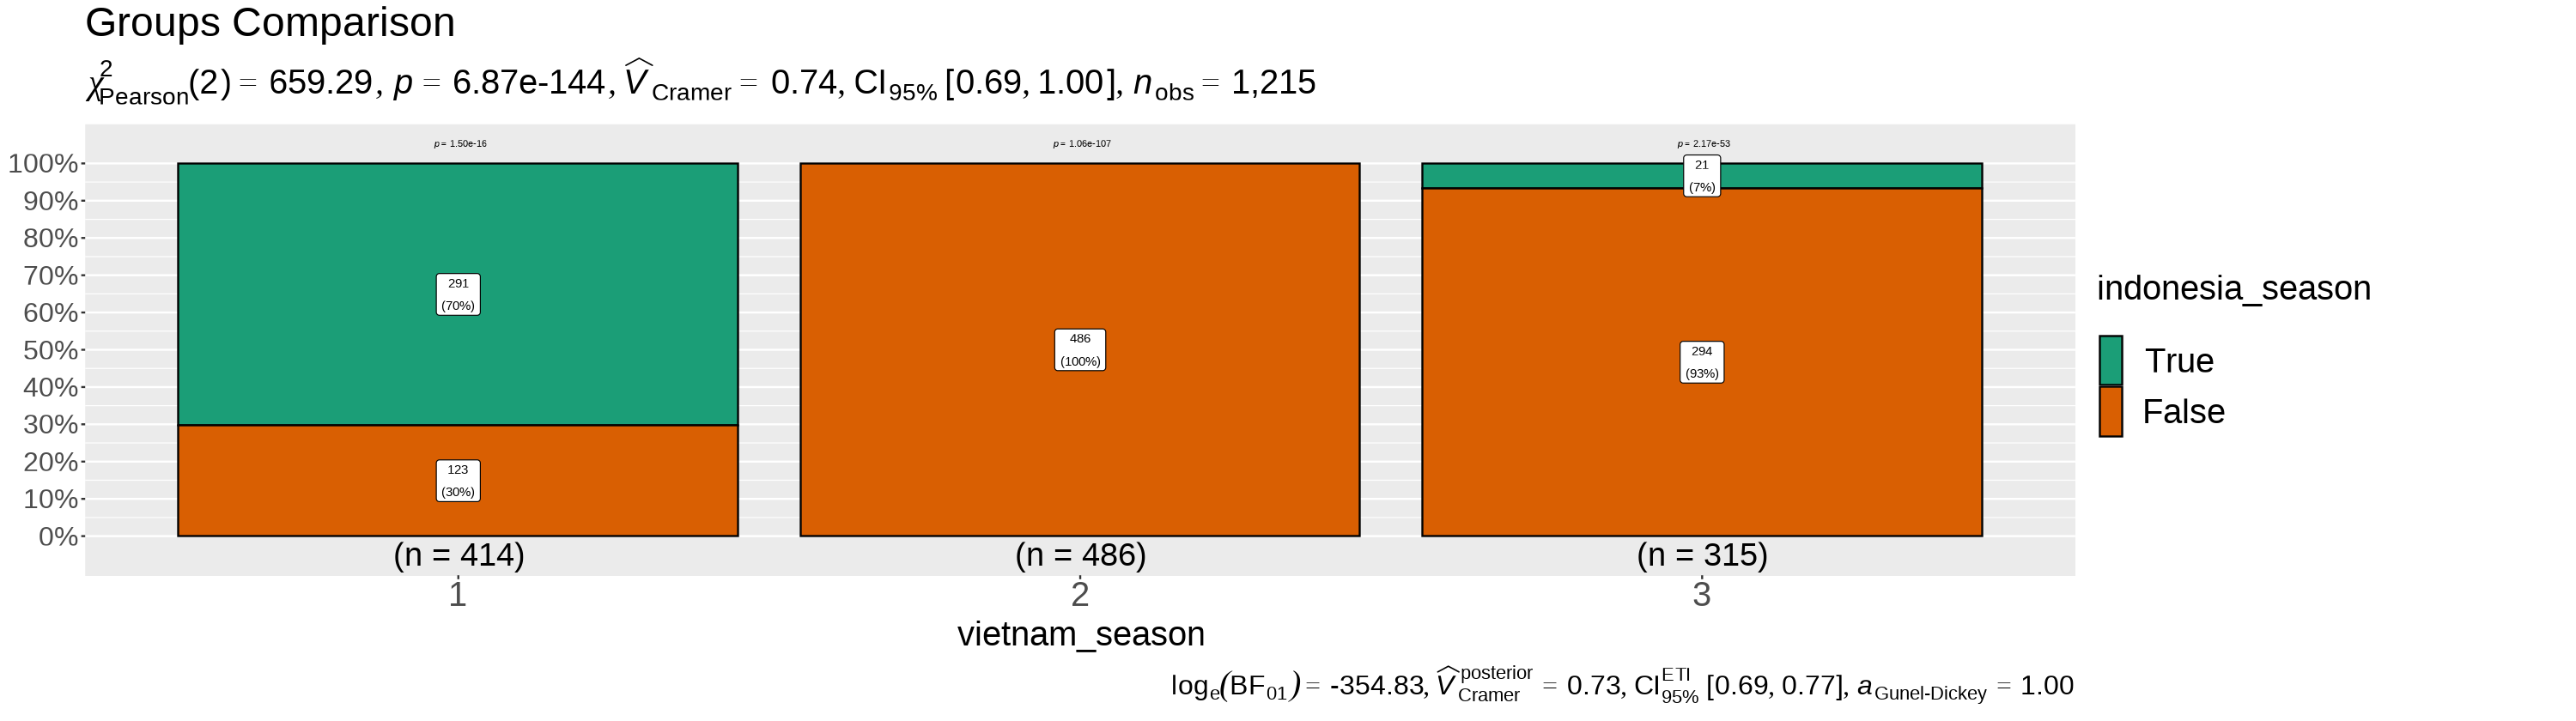

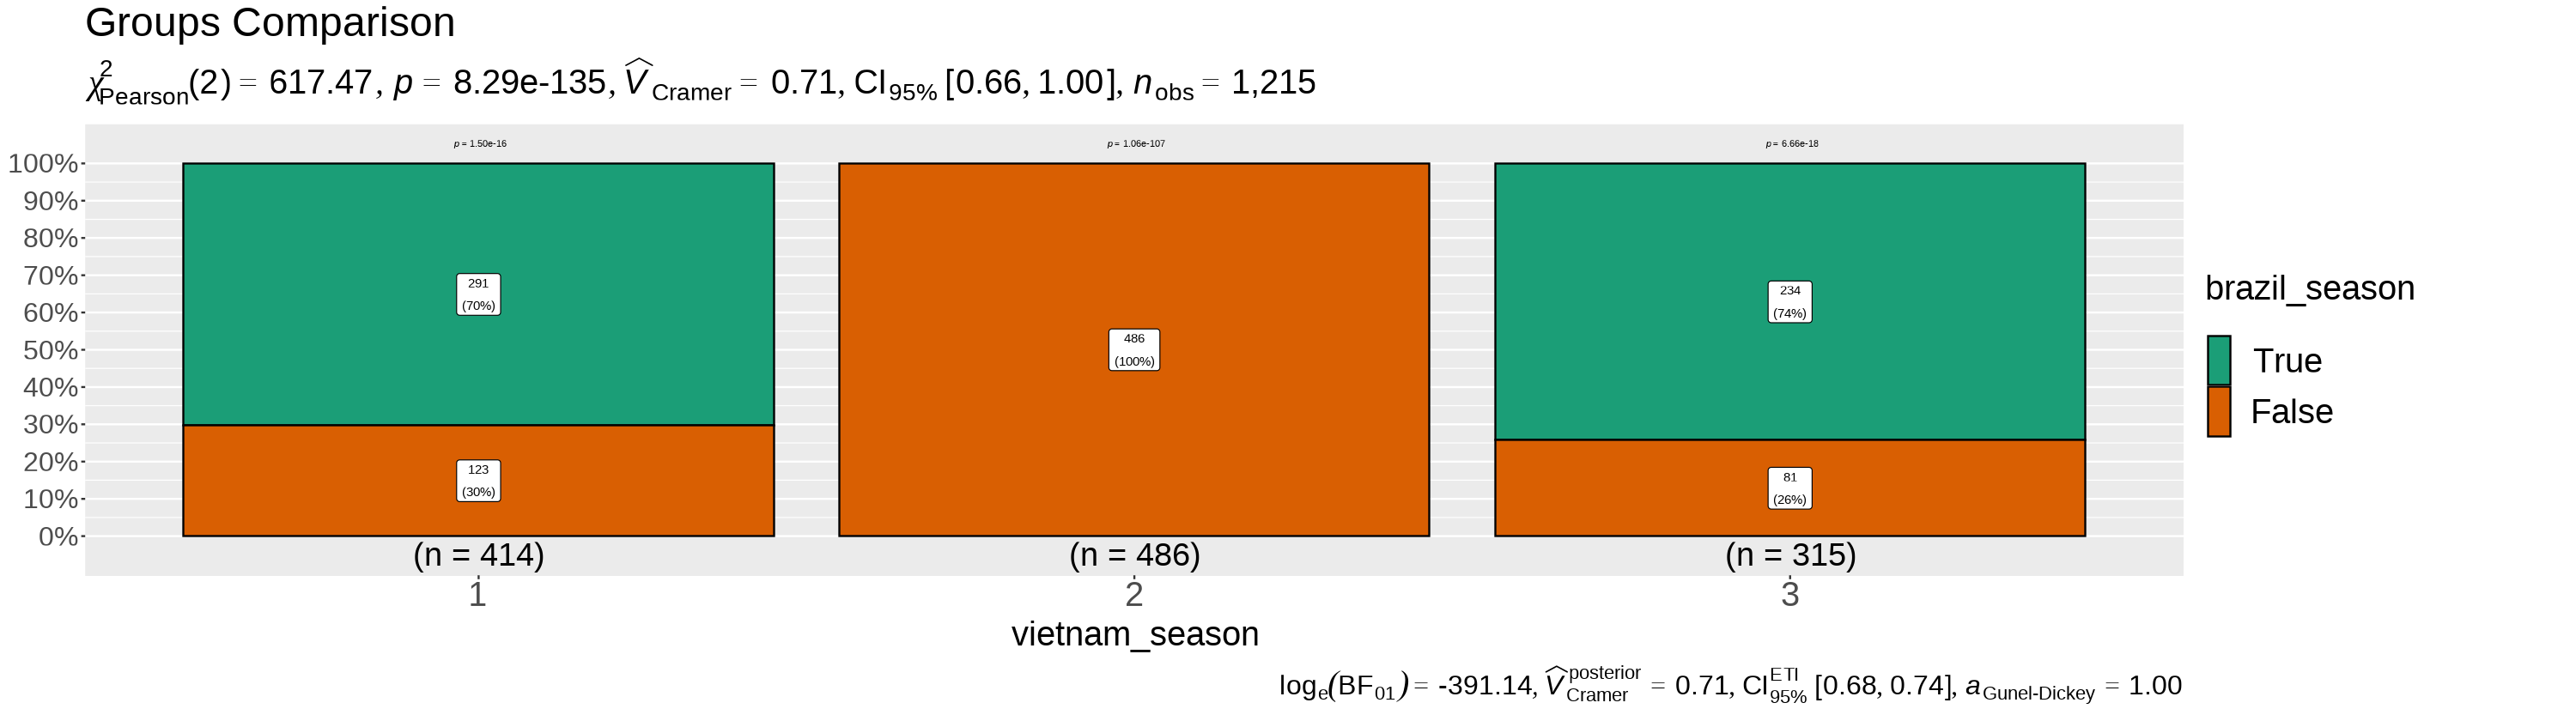

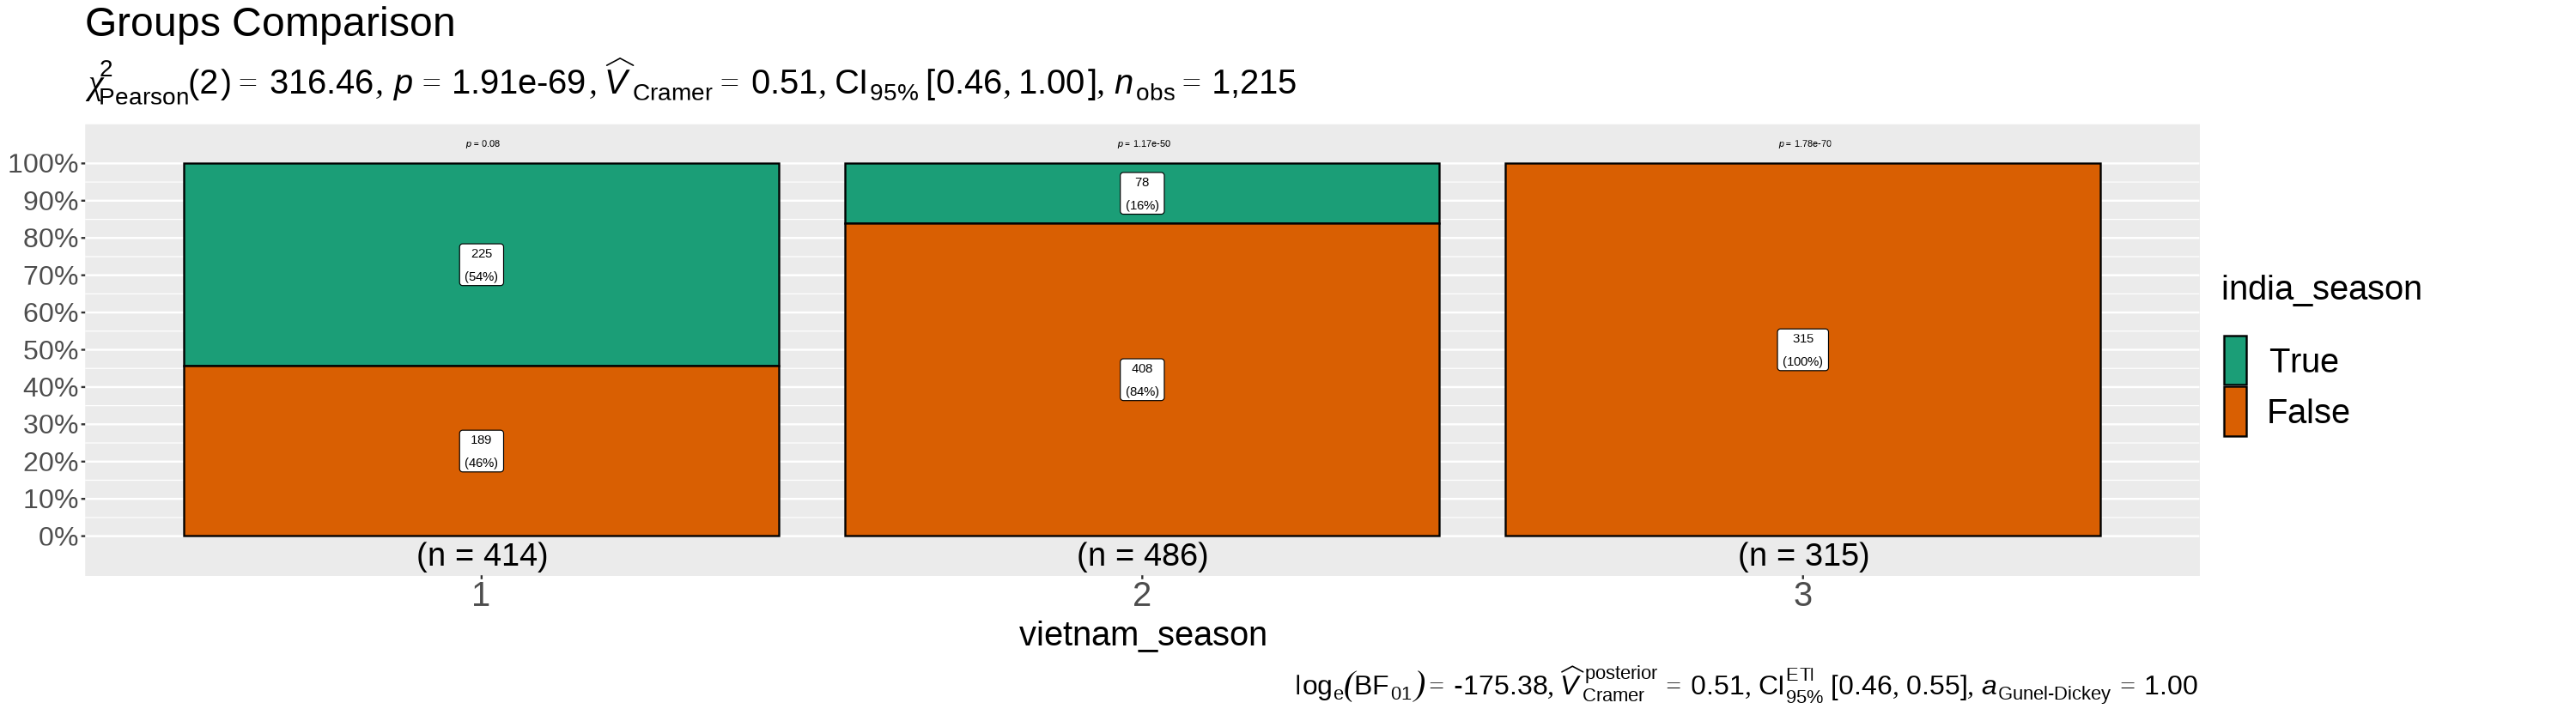

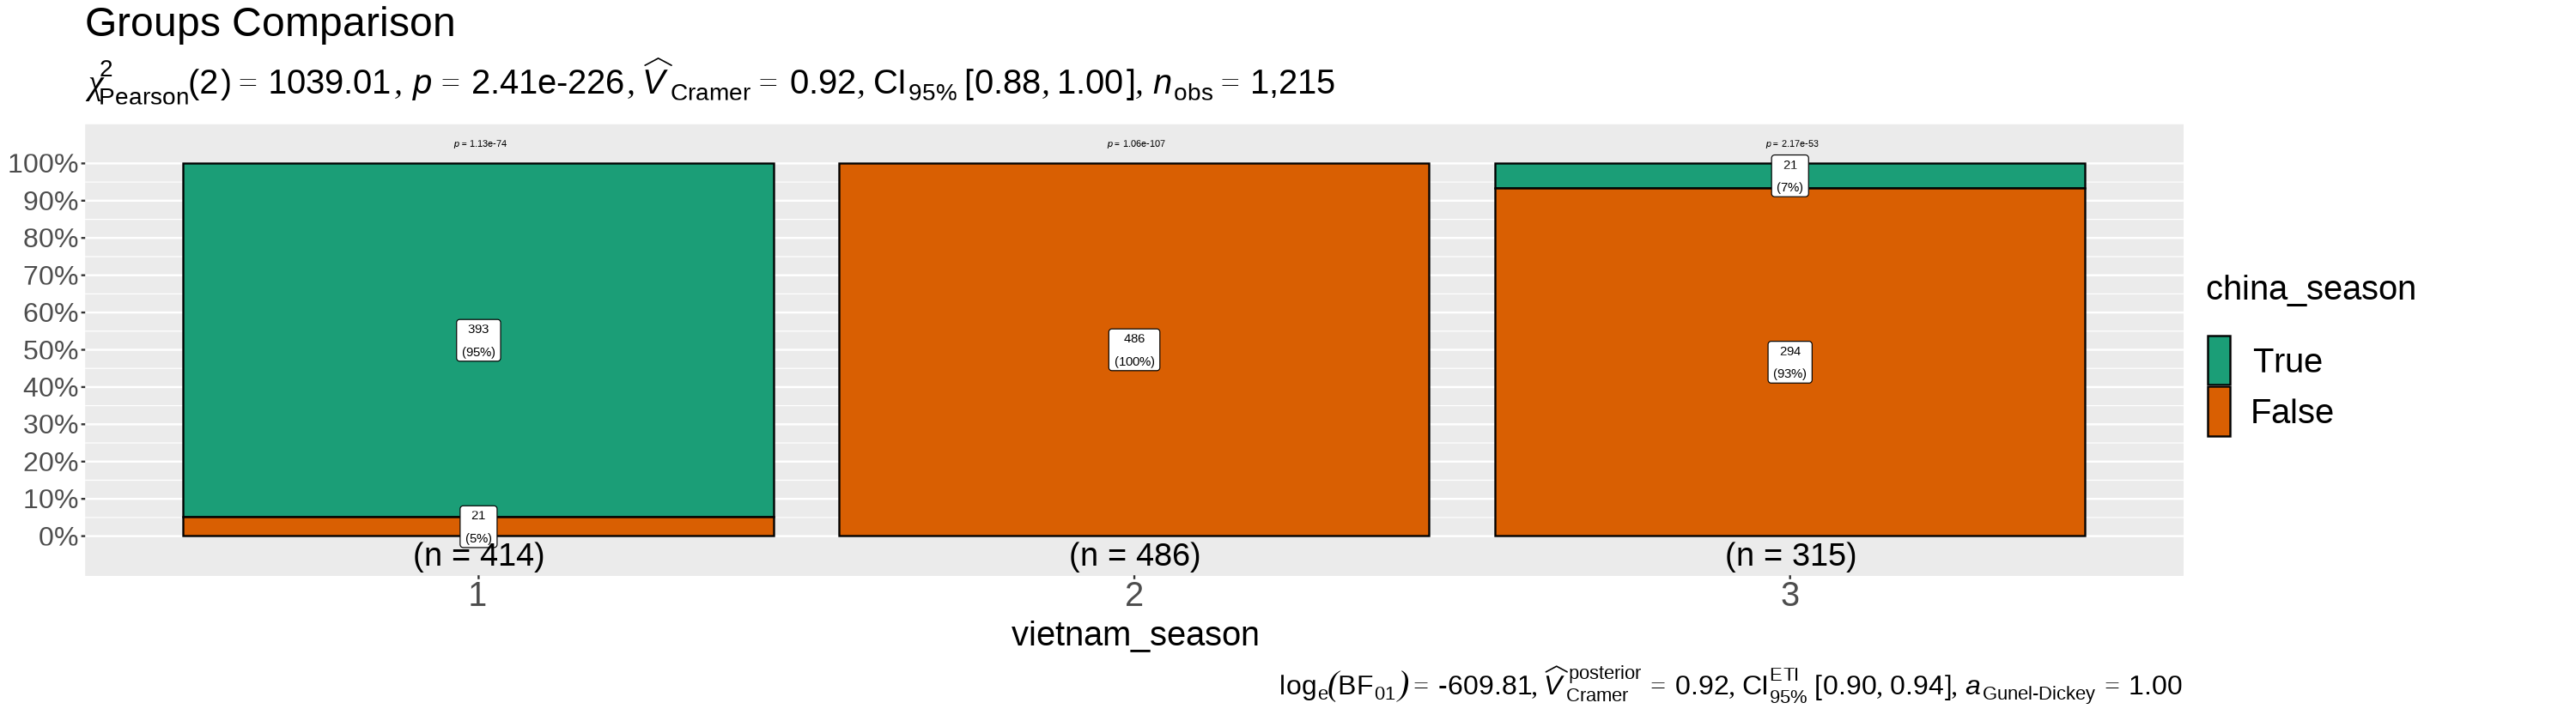

In [36]:
df %>% ggbarstats(x=indonesia_season,y = vietnam_season,label = "both",ggtheme = ggplot2::theme_gray(),sample.size.label.args = list(size = 10),
title ="Groups Comparison")+my_thems

df %>% ggbarstats(x=brazil_season,y = vietnam_season,label = "both",ggtheme = ggplot2::theme_gray(),sample.size.label.args = list(size = 10),
title ="Groups Comparison")+my_thems

df %>% ggbarstats(x=india_season,y = vietnam_season,label = "both",ggtheme = ggplot2::theme_gray(),sample.size.label.args = list(size = 10),
title ="Groups Comparison")+my_thems

df %>% ggbarstats(x=china_season,y = vietnam_season,label = "both",ggtheme = ggplot2::theme_gray(),sample.size.label.args = list(size = 10),
title ="Groups Comparison")+my_thems

In [38]:
table_data <- table(df$brazil_season,df$vietnam_season)
pairwise_prop_test(table_data)

group1 group2 p         p.adj     p.adj.signif
1 1      2      4.19e-111 8.39e-111 ****        
2 1      3       2.68e-01  2.68e-01 ns          
3 2      3      3.78e-112 1.13e-111 ****

In [55]:
table_data <- table(df$india_season,df$vietnam_season)
pairwise_prop_test(table_data)

group1 group2 p        p.adj    p.adj.signif
1 1      2      2.02e-33 4.04e-33 ****        
2 1      3      3.07e-55 9.20e-55 ****        
3 2      3      1.81e-13 1.81e-13 ****

In [40]:
table_data <- table(df$indonesia_season,df$vietnam_season)
pairwise_prop_test(table_data)

group1 group2 p         p.adj     p.adj.signif
1 1      2      4.19e-111 1.26e-110 ****        
2 1      3       1.00e-65  2.00e-65 ****        
3 2      3       2.99e-08  2.99e-08 ****

In [41]:
table_data <- table(df$china_season,df$vietnam_season)
pairwise_prop_test(table_data)

group1 group2 p         p.adj     p.adj.signif
1 1      2      2.80e-179 8.41e-179 ****        
2 1      3      9.76e-125 1.95e-124 ****        
3 2      3       2.99e-08  2.99e-08 ****

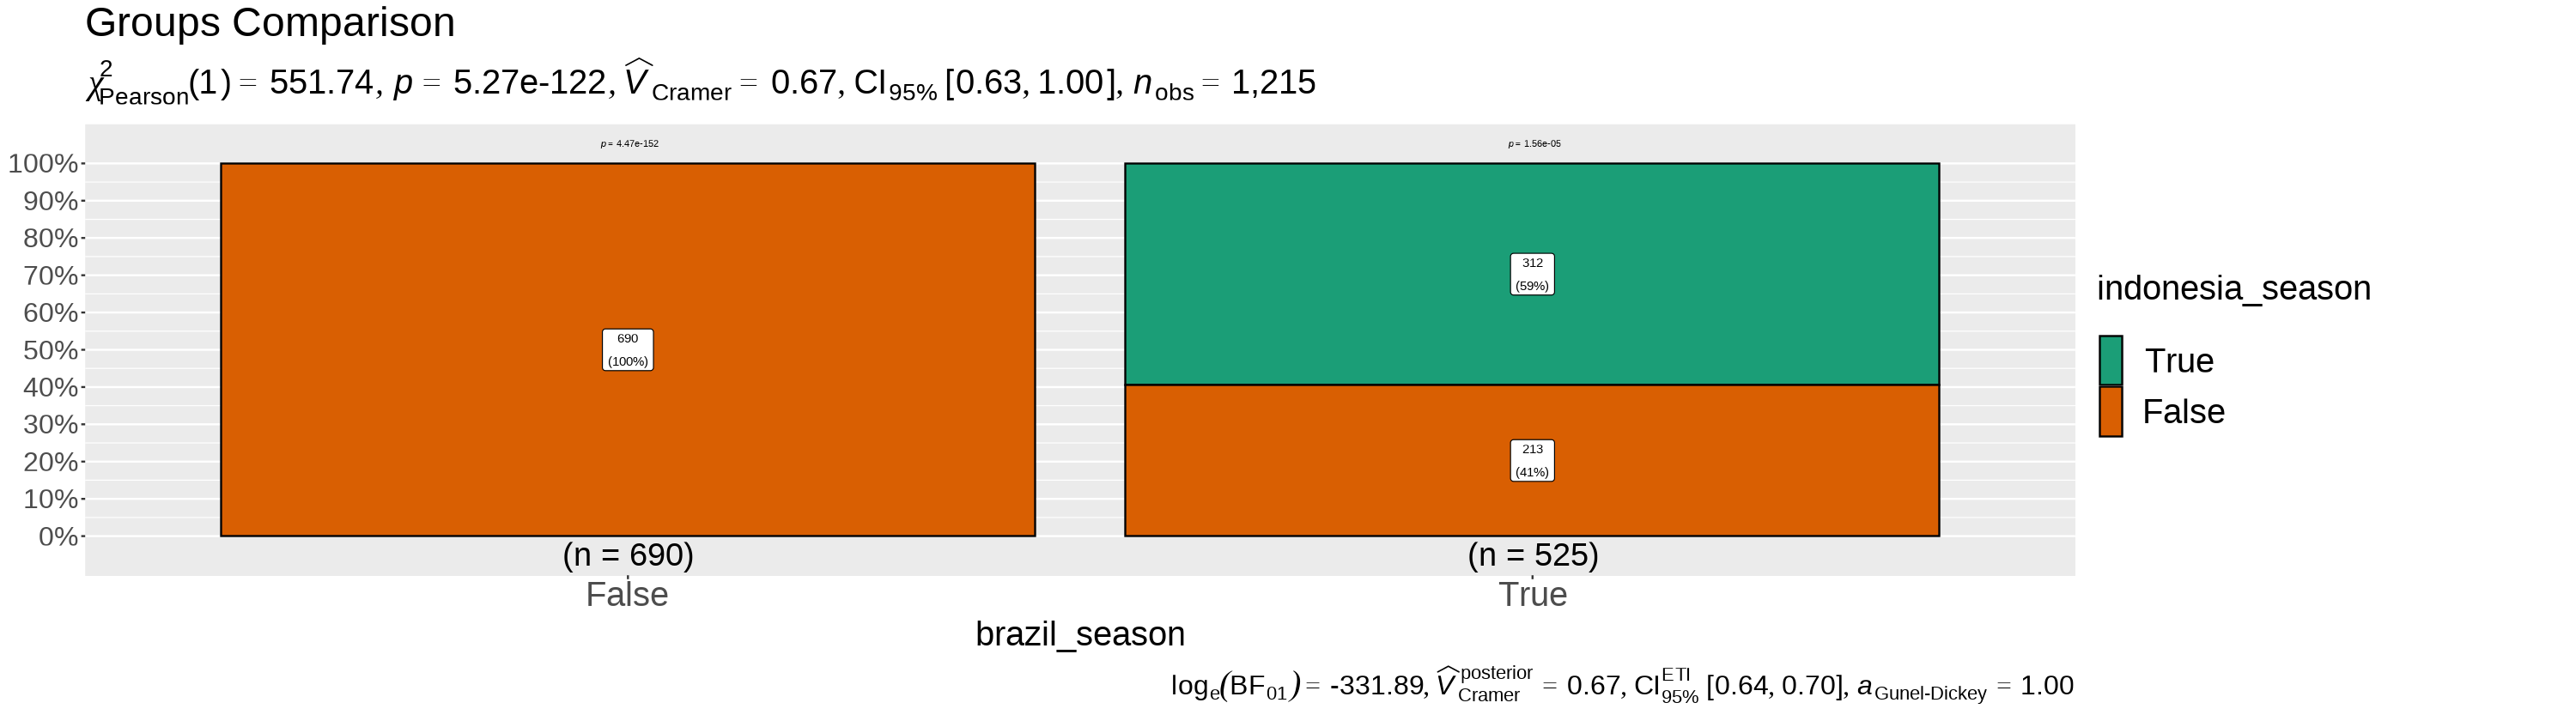

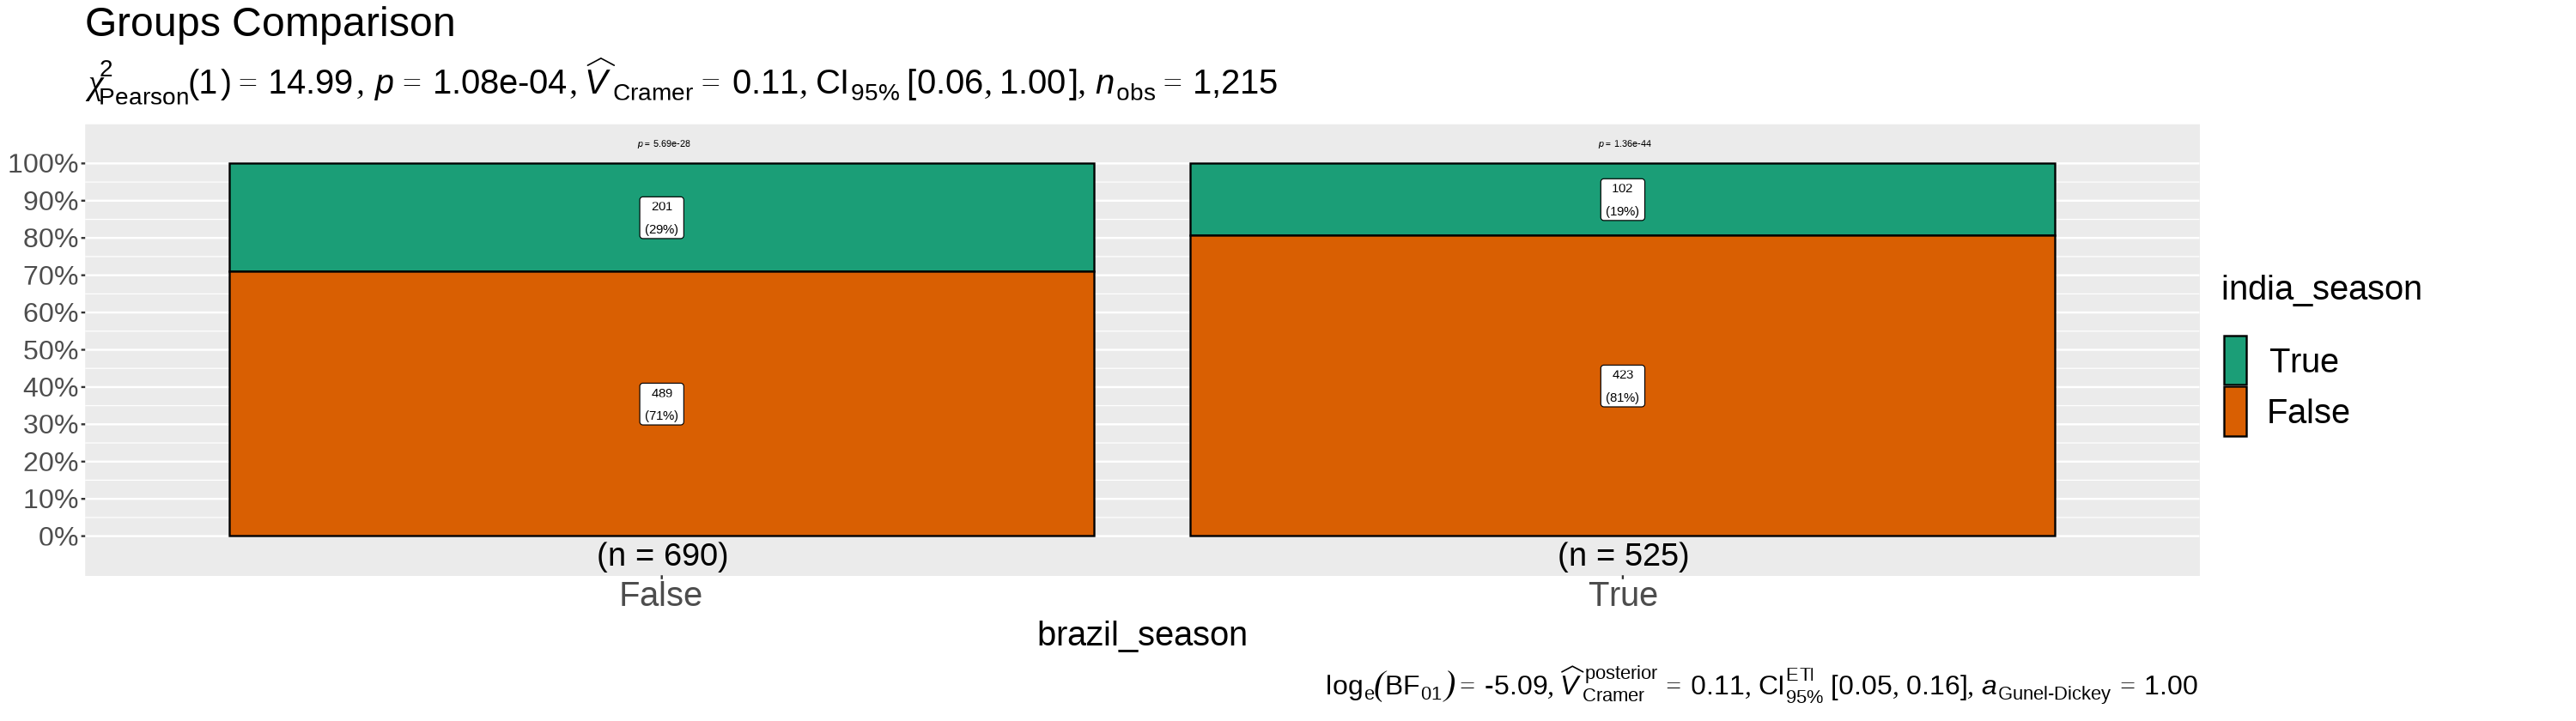

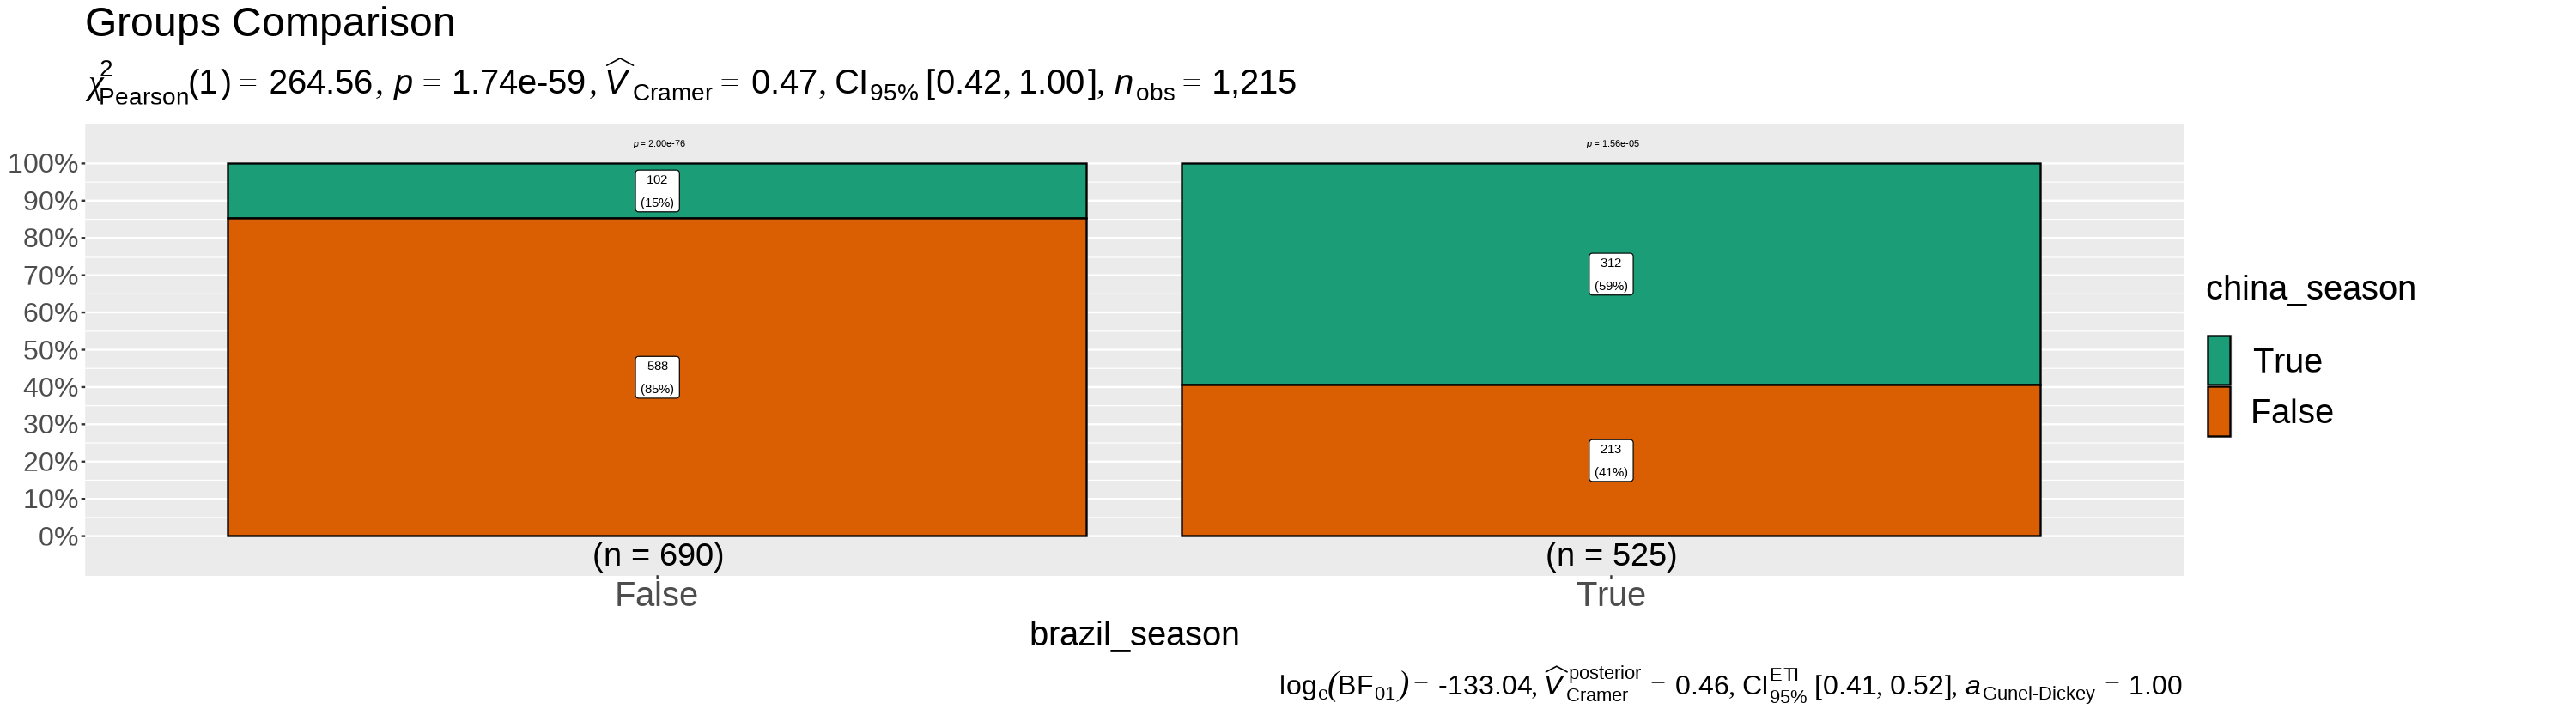

In [44]:
df %>% ggbarstats(x=indonesia_season,y = brazil_season,label = "both",ggtheme = ggplot2::theme_gray(),sample.size.label.args = list(size = 10),
title ="Groups Comparison")+my_thems

df %>% ggbarstats(x=india_season,y = brazil_season,label = "both",ggtheme = ggplot2::theme_gray(),sample.size.label.args = list(size = 10),
title ="Groups Comparison")+my_thems

df %>% ggbarstats(x=china_season,y = brazil_season,label = "both",ggtheme = ggplot2::theme_gray(),sample.size.label.args = list(size = 10),
title ="Groups Comparison")+my_thems

In [45]:
table_data <- table(df$indonesia_season,df$brazil_season)
pairwise_prop_test(table_data)

group1 group2 p        p.adj    p.adj.signif
1 False  True   2.5e-121 2.5e-121 ****

In [46]:
table_data <- table(df$india_season,df$brazil_season)
pairwise_prop_test(table_data)

group1 group2 p        p.adj    p.adj.signif
1 False  True   0.000142 0.000142 ***

In [47]:
table_data <- table(df$china_season,df$brazil_season)
pairwise_prop_test(table_data)

group1 group2 p        p.adj    p.adj.signif
1 False  True   4.72e-59 4.72e-59 ****

In [48]:
df %>% head()

week_start_dt week_end_dt vietnam_season p_color price    total_volume
1 2015-12-28    2016-01-03  2              green   6.599075 1596040     
2 2015-12-28    2016-01-03  2              red     7.175335 1596040     
3 2015-12-28    2016-01-03  2              yellow  7.300575 1596040     
4 2016-01-04    2016-01-10  2              yellow  7.379675 2295578     
5 2016-01-04    2016-01-10  2              red     7.175335 2295578     
6 2016-01-04    2016-01-10  2              green   6.599075 2295578     
  brazil  india   vietnam indonesia china brazil_season indonesia_season
1 10793.5 65658.1 1519589 0         0     False         False           
2 10793.5 65658.1 1519589 0         0     False         False           
3 10793.5 65658.1 1519589 0         0     False         False           
4  5677.8 15274.4 2274626 0         0     False         False           
5  5677.8 15274.4 2274626 0         0     False         False           
6  5677.8 15274.4 2274626 0         0     False         False           
  india_season china_season jordan_max_price jordan_min_price demand supply 
1 False        False        6.625            6.325              0.50  0.1650
2 False        False        7.525            7.125              0.51  0.1683
3 False        False        7.425            7.025             16.55  5.4615
4 False        False        7.525            7.025            271.16 89.4828
5 False        False        7.625            7.125             42.33 13.9689
6 False        False        6.625            6.325              0.58  0.1914

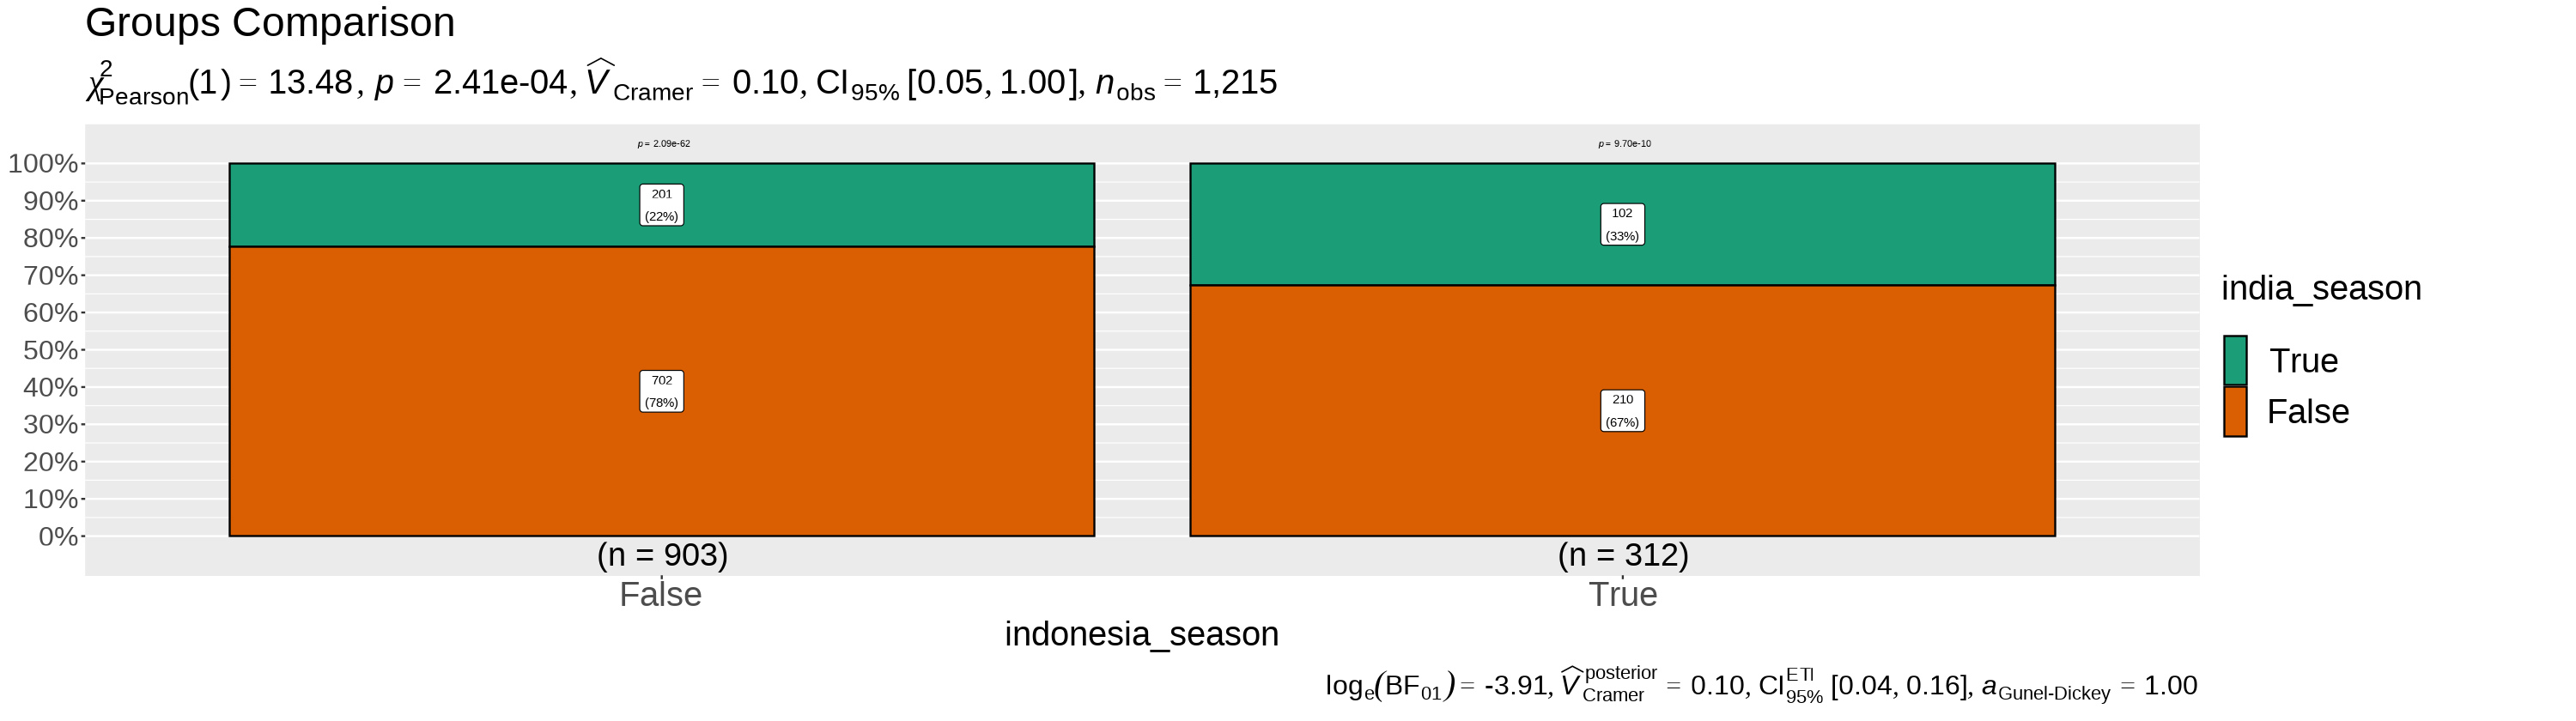

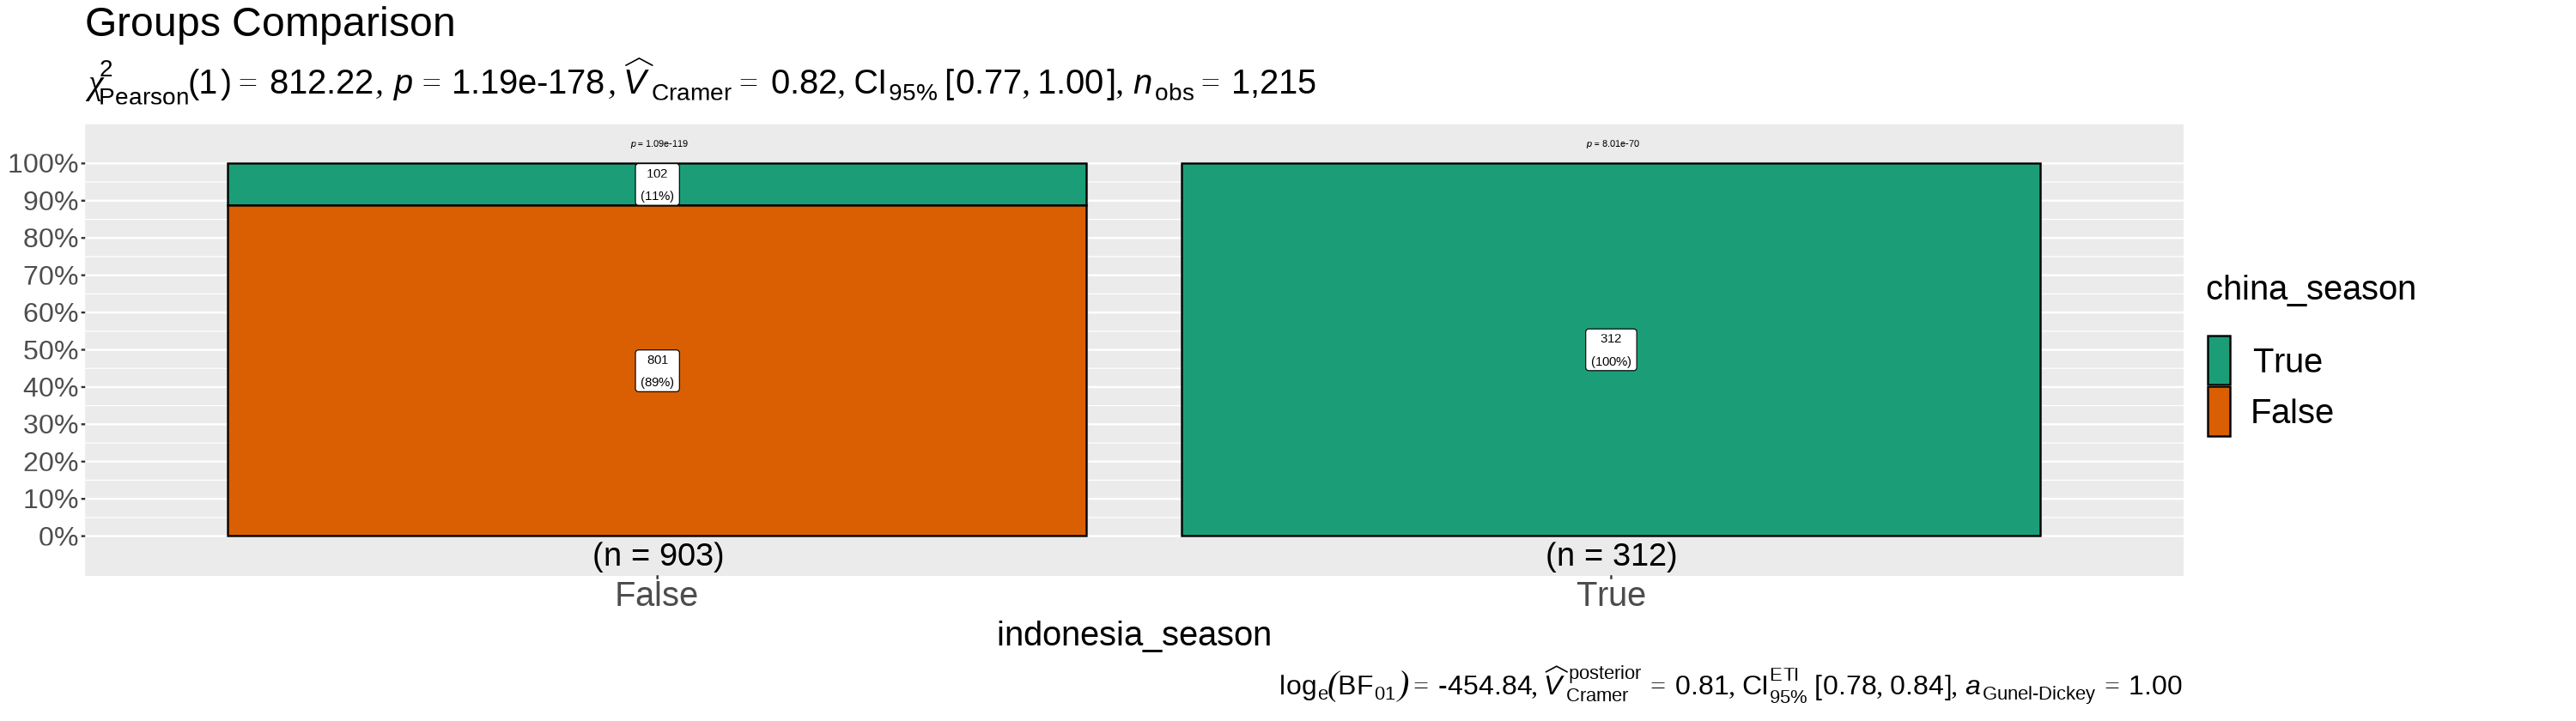

In [50]:
df %>% ggbarstats(x=india_season,y = indonesia_season,label = "both",ggtheme = ggplot2::theme_gray(),sample.size.label.args = list(size = 10),
title ="Groups Comparison")+my_thems

df %>% ggbarstats(x=china_season,y = indonesia_season,label = "both",ggtheme = ggplot2::theme_gray(),sample.size.label.args = list(size = 10),
title ="Groups Comparison")+my_thems

In [51]:
table_data <- table(df$india_season,df$indonesia_season)
pairwise_prop_test(table_data)

group1 group2 p        p.adj    p.adj.signif
1 False  True   0.000323 0.000323 ***

In [52]:
table_data <- table(df$china_season,df$indonesia_season)
pairwise_prop_test(table_data)

group1 group2 p         p.adj     p.adj.signif
1 False  True   8.55e-178 8.55e-178 ****

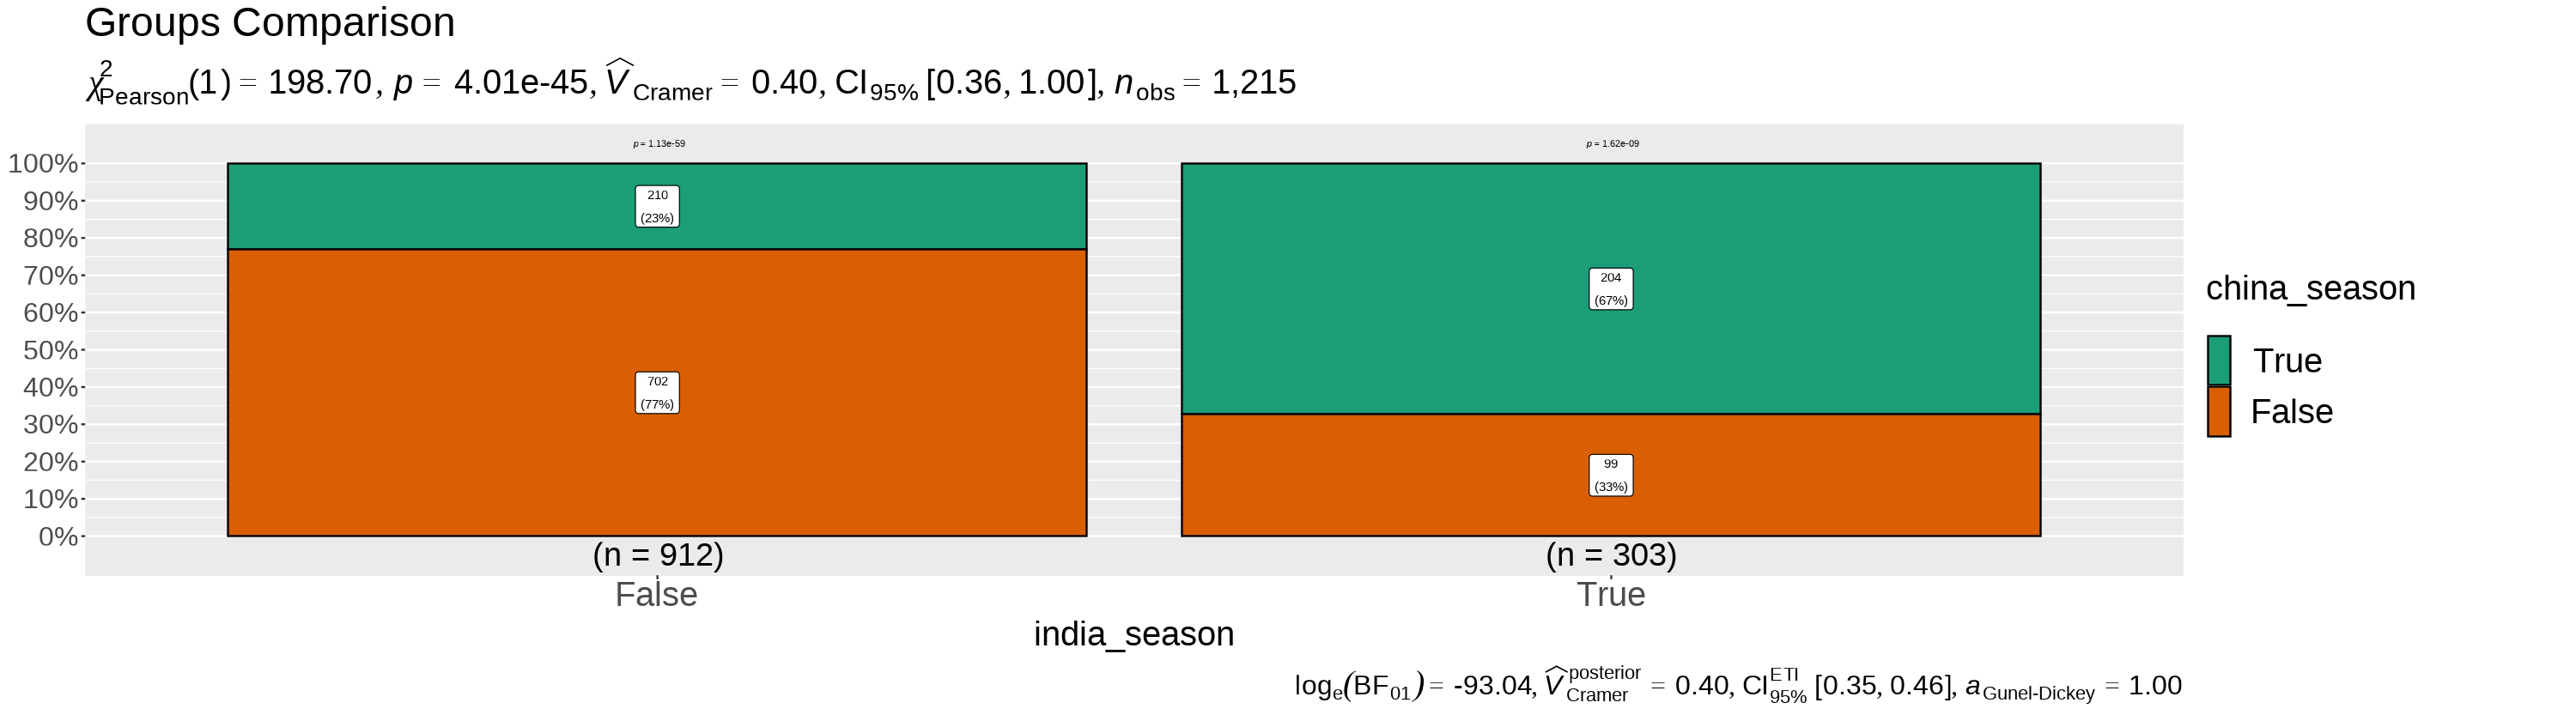

In [49]:
df %>% ggbarstats(x=china_season,y = india_season,label = "both",ggtheme = ggplot2::theme_gray(),sample.size.label.args = list(size = 10),
title ="Groups Comparison")+my_thems


In [53]:
table_data <- table(df$china_season,df$india_season)
pairwise_prop_test(table_data)

group1 group2 p        p.adj    p.adj.signif
1 False  True   1.08e-44 1.08e-44 ****